In [2]:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/samuel/Documents/Projects/Dementia Project/NewDataset/uk_biobank_dataset.csv', low_memory=False)

df.head()

,Age at recruitment,Year of birth,Standard PRS for alzheimer's disease (AD),Townsend deprivation index at recruitment,Number in household | Instance 0,Has_Heart_attack,Has_Angina,Has_Stroke,Has_High_blood_pressure,Has_Any_Vascular_Heart_Problem,...,Bipolar and major depression status | Instance 0_Single Probable major depression episode,Probable recurrent major depression (moderate) | Instance 0_Yes,Probable recurrent major depression (severe) | Instance 0_Yes,Single episode of probable major depression | Instance 0_Yes,Worrier / anxious feelings | Instance 0_Do not know,Worrier / anxious feelings | Instance 0_No,Worrier / anxious feelings | Instance 0_Prefer not to answer,Worrier / anxious feelings | Instance 0_Yes,Hand grip strength | Instance 0,Gate_speed_slow
0,68,1941,0.434412,-3.46,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,46.0,0
1,69,1940,0.615753,2.85,2.0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,20.0,1
2,56,1953,-0.064744,3.21,2.0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,5.0,0
3,68,1941,-0.982062,-4.13,2.0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,38.0,0
4,67,1943,0.453298,3.38,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,50.0,0


### Train, Val, Test Split

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Dementia Status']) # Features

y = df['Dementia Status'] # Label

# First split: 70% Training and 30% (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: 50% of the remaining 30% for Validation and 50% for Test (15% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verify the shapes of the splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1297, 64)
Validation set shape: (278, 64)
Test set shape: (278, 64)


In [5]:
feature_names = X_train.columns.tolist()
feature_names

['Age at recruitment',
 'Year of birth',
 "Standard PRS for alzheimer's disease (AD)",
 'Townsend deprivation index at recruitment',
 'Number in household | Instance 0',
 'Has_Heart_attack',
 'Has_Angina',
 'Has_Stroke',
 'Has_High_blood_pressure',
 'Has_Any_Vascular_Heart_Problem',
 'Sleep duration | Instance 0',
 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0',
 'Number of days/week of moderate physical activity 10+ minutes | Instance 0',
 'Mean time to correctly identify matches | Instance 0',
 'Fluid intelligence score | Instance 0',
 'Cholesterol | Instance 0',
 'Triglycerides | Instance 0',
 'C-reactive protein | Instance 0',
 'Glucose | Instance 0',
 'Glycated haemoglobin (HbA1c) | Instance 0',
 'Creatinine | Instance 0',
 'Computed_RSA_ln_ms2_Inst0',
 'Average_HR_bpm_Inst0',
 'Average_RR_ms_Inst0',
 'Pretest_RSA_ln_ms2_Inst0',
 'Activity_RSA_ln_ms2_Inst0',
 'Recovery_RSA_ln_ms2_Inst0',
 'Avg_HeartPeriod_ms_Inst0',
 'Sex_Female',
 'Sex_Male',
 'Diabe

## No RSA component

In [6]:
features_names_no_rsa = X_train.drop(columns=[
    'Computed_RSA_ln_ms2_Inst0',
    'Pretest_RSA_ln_ms2_Inst0',
    'Activity_RSA_ln_ms2_Inst0',
    'Recovery_RSA_ln_ms2_Inst0'
]).columns.tolist()

X_train_no_rsa = X_train[features_names_no_rsa]
X_val_no_rsa = X_val[features_names_no_rsa]
X_test_no_rsa = X_test[features_names_no_rsa]


## No RSA Component and Grip Strength

In [7]:
features_names_no_rsa_and_grip_strength = X_train.drop(columns=[
    'Computed_RSA_ln_ms2_Inst0',
    'Pretest_RSA_ln_ms2_Inst0',
    'Activity_RSA_ln_ms2_Inst0',
    'Recovery_RSA_ln_ms2_Inst0',
    'Hand grip strength | Instance 0'
]).columns.tolist()

X_train_no_rsa_but_grip_strength = X_train[features_names_no_rsa_and_grip_strength]
X_val_no_rsa_but_grip_strength = X_val[features_names_no_rsa_and_grip_strength]
X_test_no_rsa_but_grip_strength = X_test[features_names_no_rsa_and_grip_strength]


## No RSA Component & Gate Speed

In [8]:
features_names_no_rsa_and_gate_speed = X_train.drop(columns=[
    'Computed_RSA_ln_ms2_Inst0',
    'Pretest_RSA_ln_ms2_Inst0',
    'Activity_RSA_ln_ms2_Inst0',
    'Recovery_RSA_ln_ms2_Inst0',
    'Gate_speed_slow'
]).columns.tolist()

X_train_no_rsa_but_gate_speed = X_train[features_names_no_rsa_and_gate_speed]
X_val_no_rsa_but_gate_speed = X_val[features_names_no_rsa_and_gate_speed]
X_test_no_rsa_but_gate_speed = X_test[features_names_no_rsa_and_gate_speed]


#### Training & Test Set for Shap Values



### Normalise row values

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) # Training
                                            
X_val = scaler.transform(X_val) # Validation

X_test = scaler.transform(X_test) # Testing



In [10]:
scaler_no_rsa = StandardScaler()

X_train_no_rsa = scaler_no_rsa.fit_transform(X_train_no_rsa)
X_val_no_rsa = scaler_no_rsa.transform(X_val_no_rsa)
X_test_no_rsa = scaler_no_rsa.transform(X_test_no_rsa)


In [11]:
scaler_no_rsa_grip = StandardScaler()

X_train_no_rsa_but_grip_strength = scaler_no_rsa_grip.fit_transform(X_train_no_rsa_but_grip_strength)
X_val_no_rsa_but_grip_strength = scaler_no_rsa_grip.transform(X_val_no_rsa_but_grip_strength)
X_test_no_rsa_but_grip_strength = scaler_no_rsa_grip.transform(X_test_no_rsa_but_grip_strength)


In [12]:
scaler_no_rsa_gate = StandardScaler()

X_train_no_rsa_but_gate_speed = scaler_no_rsa_gate.fit_transform(X_train_no_rsa_but_gate_speed)
X_val_no_rsa_but_gate_speed = scaler_no_rsa_gate.transform(X_val_no_rsa_but_gate_speed)
X_test_no_rsa_but_gate_speed = scaler_no_rsa_gate.transform(X_test_no_rsa_but_gate_speed)


### Scale datapoints

In [13]:
# Function to verify scaling

def verify_scaling(scaled_data, scaler, feature_set_name):
    means = np.mean(scaled_data, axis=0)
    stds = np.std(scaled_data, axis=0)
    print(f"{feature_set_name} - Mean: {means}, Std Dev: {stds}")

# Example verification for Combined Features
verify_scaling(X_train, scaler, "Training Features")

Training Features - Mean: [ 3.43766821e-16  2.79396141e-16  1.09567114e-17  2.73917786e-17
 -8.21753357e-18 -1.09567114e-16 -2.36254090e-17 -4.93052014e-17
  1.16415059e-17 -3.69789011e-17 -1.56133138e-16  6.57402685e-17
 -1.09567114e-17  3.71158599e-16  5.10171876e-17 -8.21753357e-17
 -2.60221896e-16 -4.79356125e-17  6.90272820e-16  9.62821016e-16
 -1.39698071e-16  3.35549287e-16  4.37583662e-16  7.39578021e-17
  3.34179698e-16 -1.23263004e-16 -1.53393960e-16  7.39578021e-17
 -2.73917786e-18  2.73917786e-18 -2.19134228e-17 -1.87633683e-16
 -1.09567114e-17  4.93052014e-17  4.45116402e-17  6.02619128e-17
 -1.09567114e-17 -6.91642409e-17  4.38268457e-17 -6.02619128e-17
 -1.09567114e-17 -3.56093121e-17 -5.47835571e-17 -4.38268457e-17
  1.64350671e-17  3.28701343e-17 -1.09567114e-17 -1.64350671e-17
 -9.86104028e-17 -5.47835571e-18  1.09567114e-17 -5.47835571e-18
 -4.65660235e-17  4.38268457e-17 -1.30110948e-17 -2.19134228e-17
  2.19134228e-17  4.79356125e-17  4.93052014e-17  6.57402685e-17

### Ensure that they are Numpy Arrays

In [14]:
# Main full feature set
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

# RSA dropped
X_train_no_rsa = np.array(X_train_no_rsa)
X_val_no_rsa = np.array(X_val_no_rsa)
X_test_no_rsa = np.array(X_test_no_rsa)

# RSA dropped but includes grip strength (gait speed removed)|
X_train_no_rsa_but_grip_strength = np.array(X_train_no_rsa_but_grip_strength)
X_val_no_rsa_but_grip_strength = np.array(X_val_no_rsa_but_grip_strength)
X_test_no_rsa_but_grip_strength = np.array(X_test_no_rsa_but_grip_strength)

# RSA dropped but includes gait speed (grip strength removed)
X_train_no_rsa_but_gate_speed = np.array(X_train_no_rsa_but_gate_speed)
X_val_no_rsa_but_gate_speed = np.array(X_val_no_rsa_but_gate_speed)
X_test_no_rsa_but_gate_speed = np.array(X_test_no_rsa_but_gate_speed)


### Check for class imbalance in the dataset

In [15]:
y_series = pd.Series(y_train)

# Absolute counts
print("Class Counts:")
print(y_series.value_counts())

# Proportions
print("\nClass Proportions:")
print(y_series.value_counts(normalize=True))

Class Counts:
1    656
0    641
Name: count, dtype: int64

Class Proportions:
1    0.505783
0    0.494217
Name: proportion, dtype: float64


### RFE Pipeline with basic models

In [16]:
from joblib import Parallel, delayed
import os
from copy import deepcopy
from IPython.display import display

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, cohen_kappa_score
)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.svm import SVC
from xgboost import XGBClassifier

#  Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

#  Define estimators
estimators = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Perceptron': Perceptron(max_iter=1000, random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42),
}

feature_names = np.array(feature_names)  

# 🔹 Model evaluation function
def evaluate_model_scoring(X_train, y_train, X_val, y_val, X_test, y_test, feature_names, name, base_est, scoring, cv):
    est_copy = deepcopy(base_est)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('fs', RFECV(estimator=est_copy, step=1, cv=cv, scoring=scoring, n_jobs=-1)),
        ('clf', est_copy)
    ])
    pipe.fit(X_train, y_train)

    support = pipe.named_steps['fs'].support_
    n_features = support.sum()
    selected = feature_names[support].tolist()

    def compute_metrics(X, y, dataset):
        y_pred = pipe.predict(X)
        y_score = pipe.predict_proba(X)[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(X)
        auc = roc_auc_score(y, y_score) if y_score is not None else np.nan
        rep = classification_report(y, y_pred, output_dict=True, zero_division=0).get('1', {})
        kappa = cohen_kappa_score(y, y_pred)
        
        
        # Print class distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        print(f"\n🔹 {dataset} predicted class distribution:")
        for cls, cnt in zip(unique, counts):
            print(f"Class {cls}: {cnt} samples")

        return {
            'Dataset': dataset,
            'Scoring': scoring,
            'Model': name,
            'Accuracy': accuracy_score(y, y_pred),
            'ROC-AUC': auc,
            'Precision': rep.get('precision', np.nan),
            'Recall': rep.get('recall', np.nan),
            'F1 Score': rep.get('f1-score', np.nan),
            'Cohen Kappa': kappa,
            'n_features': n_features,
            'features': selected
        }

    return (
        compute_metrics(X_train, y_train, 'Train'),
        compute_metrics(X_val, y_val, 'Validation'),
        compute_metrics(X_test, y_test, 'Test')
    )

# 🔹 Parallel model runs
def run_models_parallel(X_train, y_train, X_val, y_val, X_test, y_test,
                        feature_names, estimators, cv,
                        scorings=['accuracy', 'f1', 'precision', 'roc_auc'],
                        output_dir='results_parallel'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_model_scoring)(
            X_train, y_train, X_val, y_val, X_test, y_test,
            feature_names, name, model, scoring, cv
        )
        for scoring in scorings
        for name, model in estimators.items()
    )

    # Unpack results
    train_records, val_records, test_records = zip(*results)
    train_df = pd.DataFrame(train_records)
    val_df = pd.DataFrame(val_records)
    test_df = pd.DataFrame(test_records)

    # Save outputs
    train_df.to_csv(os.path.join(output_dir, 'train_results_parallel.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, 'validation_results_parallel.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test_results_parallel.csv'), index=False)

    # Display outputs
    print("\n✅ Training Set Performance")
    display(train_df.style.set_caption("Training Set Performance (Parallel)"))
    print("\n✅ Validation Set Performance")
    display(val_df.style.set_caption("Validation Set Performance (Parallel)"))
    print("\n✅ Test Set Performance")
    display(test_df.style.set_caption("Test Set Performance (Parallel)"))

    return train_df, val_df, test_df

# 🔹 Run models
train_df, val_df, test_df = run_models_parallel(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    feature_names,
    estimators,
    cv,
    scorings=['accuracy', 'f1', 'precision', 'roc_auc'],
    output_dir='results_parallel_run'
)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



🔹 Train predicted class distribution:
Class 0: 611 samples
Class 1: 686 samples

🔹 Validation predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Train predicted class distribution:
Class 0: 611 samples
Class 1: 686 samples

🔹 Validation predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Train predicted class distribution:
Class 0: 598 samples
Class 1: 699 samples

🔹 Validation predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples

🔹 Test predicted class distribution:
Class 0: 142 samples
Class 1: 136 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 149 samples
Class 1: 129 samples

🔹 Test predicted class distribution:
Class 0: 149 samples
Class 1: 129 samples

🔹 Train pre

/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _war


🔹 Train predicted class distribution:
Class 0: 762 samples
Class 1: 535 samples

🔹 Validation predicted class distribution:
Class 0: 182 samples
Class 1: 96 samples

🔹 Test predicted class distribution:
Class 0: 176 samples
Class 1: 102 samples

🔹 Train predicted class distribution:
Class 0: 595 samples
Class 1: 702 samples

🔹 Validation predicted class distribution:
Class 0: 126 samples
Class 1: 152 samples

🔹 Test predicted class distribution:
Class 0: 144 samples
Class 1: 134 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 148 samples
Class 1: 130 samples

🔹 Test predicted class distribution:
Class 0: 150 samples
Class 1: 128 samples


[Parallel(n_jobs=-1)]: Done   9 out of  36 | elapsed:  1.6min remaining:  4.7min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples

🔹 Test predicted class distribution:
Class 0: 135 samples
Class 1: 143 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples

🔹 Test predicted class distribution:
Class 0: 135 samples
Class 1: 143 samples

🔹 Train predicted class distribution:
Class 0: 587 samples
Class 1: 710 samples

🔹 Validation predicted class distribution:
Class 0: 119 samples
Class 1: 159 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Train predicted class distribution:
Class 0: 603 samples
Class 1: 694 samples

🔹 Validation predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Test predicted class distribution:
Class 0: 140 samples
Class 1: 138 samples


[Parallel(n_jobs=-1)]: Done  13 out of  36 | elapsed:  8.2min remaining: 14.6min



🔹 Train predicted class distribution:
Class 0: 611 samples
Class 1: 686 samples

🔹 Validation predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Train predicted class distribution:
Class 0: 511 samples
Class 1: 786 samples

🔹 Validation predicted class distribution:
Class 0: 109 samples
Class 1: 169 samples

🔹 Test predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 149 samples
Class 1: 129 samples

🔹 Test predicted class distribution:
Class 0: 149 samples
Class 1: 129 samples

🔹 Train predicted class distribution:
Class 0: 591 samples
Class 1: 706 samples

🔹 Validation predicted class distribution:
Class 0: 126 samples
Class 1: 152 samples

🔹 Test predicted class distribution:
Class 0: 138 samples
Class 1: 140 samples


[Parallel(n_jobs=-1)]: Done  17 out of  36 | elapsed: 10.6min remaining: 11.8min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 127 samples
Class 1: 151 samples

🔹 Test predicted class distribution:
Class 0: 135 samples
Class 1: 143 samples

🔹 Train predicted class distribution:
Class 0: 614 samples
Class 1: 683 samples

🔹 Validation predicted class distribution:
Class 0: 127 samples
Class 1: 151 samples

🔹 Test predicted class distribution:
Class 0: 142 samples
Class 1: 136 samples

🔹 Train predicted class distribution:
Class 0: 614 samples
Class 1: 683 samples

🔹 Validation predicted class distribution:
Class 0: 127 samples
Class 1: 151 samples

🔹 Test predicted class distribution:
Class 0: 142 samples
Class 1: 136 samples

🔹 Train predicted class distribution:
Class 0: 592 samples
Class 1: 705 samples

🔹 Validation predicted class distribution:
Class 0: 118 samples
Class 1: 160 samples

🔹 Test predicted class distribution:
Class 0: 140 samples
Class 1: 138 samples


[Parallel(n_jobs=-1)]: Done  21 out of  36 | elapsed: 13.0min remaining:  9.3min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples

🔹 Test predicted class distribution:
Class 0: 127 samples
Class 1: 151 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 123 samples
Class 1: 155 samples

🔹 Test predicted class distribution:
Class 0: 133 samples
Class 1: 145 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 123 samples
Class 1: 155 samples

🔹 Test predicted class distribution:
Class 0: 133 samples
Class 1: 145 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 133 samples
Class 1: 145 samples

🔹 Test predicted class distribution:
Class 0: 139 samples
Class 1: 139 samples


[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed: 15.9min remaining:  7.0min



🔹 Train predicted class distribution:
Class 0: 581 samples
Class 1: 716 samples

🔹 Validation predicted class distribution:
Class 0: 117 samples
Class 1: 161 samples

🔹 Test predicted class distribution:
Class 0: 136 samples
Class 1: 142 samples

🔹 Train predicted class distribution:
Class 0: 614 samples
Class 1: 683 samples

🔹 Validation predicted class distribution:
Class 0: 127 samples
Class 1: 151 samples

🔹 Test predicted class distribution:
Class 0: 142 samples
Class 1: 136 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 110 samples
Class 1: 168 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Train predicted class distribution:
Class 0: 615 samples
Class 1: 682 samples

🔹 Validation predicted class distribution:
Class 0: 130 samples
Class 1: 148 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples


[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed: 19.7min remaining:  4.8min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 110 samples
Class 1: 168 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 117 samples
Class 1: 161 samples

🔹 Test predicted class distribution:
Class 0: 126 samples
Class 1: 152 samples

🔹 Train predicted class distribution:
Class 0: 619 samples
Class 1: 678 samples

🔹 Validation predicted class distribution:
Class 0: 129 samples
Class 1: 149 samples

🔹 Test predicted class distribution:
Class 0: 141 samples
Class 1: 137 samples

🔹 Train predicted class distribution:
Class 0: 615 samples
Class 1: 682 samples

🔹 Validation predicted class distribution:
Class 0: 130 samples
Class 1: 148 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples


[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed: 20.3min remaining:  1.8min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 119 samples
Class 1: 159 samples

🔹 Test predicted class distribution:
Class 0: 130 samples
Class 1: 148 samples

🔹 Train predicted class distribution:
Class 0: 617 samples
Class 1: 680 samples

🔹 Validation predicted class distribution:
Class 0: 127 samples
Class 1: 151 samples

🔹 Test predicted class distribution:
Class 0: 135 samples
Class 1: 143 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 115 samples
Class 1: 163 samples

🔹 Test predicted class distribution:
Class 0: 131 samples
Class 1: 147 samples

✅ Training Set Performance


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 21.4min finished


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Train,accuracy,Logistic Regression,0.769468,0.845447,0.755365,0.804878,0.779336,0.538520,25,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Triglycerides | Instance 0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Train,accuracy,Perceptron,0.720894,0.780443,0.714286,0.746951,0.730253,0.441415,52,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
2,Train,accuracy,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to cor


✅ Validation Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Validation,accuracy,Logistic Regression,0.719424,0.786872,0.705882,0.765957,0.734694,0.438035,25,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Triglycerides | Instance 0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Validation,accuracy,Perceptron,0.694245,0.754879,0.691781,0.716312,0.703833,0.388046,52,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
2,Validation,accuracy,Decision Tree,0.654676,0.655226,0.674419,0.617021,0.644444,0.310067,48,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'M


✅ Test Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Test,accuracy,Logistic Regression,0.741007,0.829400,0.750000,0.728571,0.739130,0.482095,25,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Triglycerides | Instance 0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Test,accuracy,Perceptron,0.705036,0.747153,0.698630,0.728571,0.713287,0.409858,52,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
2,Test,accuracy,Decision Tree,0.643885,0.644151,0.658915,0.607143,0.631970,0.288138,48,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correc

### RFE on basic models with Cohens Kappa Metric

In [17]:
from sklearn.metrics import make_scorer, cohen_kappa_score

# Define custom scorer
cohen_kappa_scorer = make_scorer(cohen_kappa_score)


# 🔹 Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# 🔹 Define estimators
estimators = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Perceptron': Perceptron(max_iter=1000, random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42),
}

feature_names = np.array(feature_names)  

# 🔹 Model evaluation function
def evaluate_model_scoring(X_train, y_train, X_val, y_val, X_test, y_test, feature_names, name, base_est, scoring, cv):
    est_copy = deepcopy(base_est)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('fs', RFECV(estimator=est_copy, step=1, cv=cv, scoring=cohen_kappa_scorer, n_jobs=-1)),
        ('clf', est_copy)
    ])
    pipe.fit(X_train, y_train)

    support = pipe.named_steps['fs'].support_
    n_features = support.sum()
    selected = feature_names[support].tolist()

    def compute_metrics(X, y, dataset):
        y_pred = pipe.predict(X)
        y_score = pipe.predict_proba(X)[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(X)
        auc = roc_auc_score(y, y_score) if y_score is not None else np.nan
        rep = classification_report(y, y_pred, output_dict=True, zero_division=0).get('1', {})
        kappa = cohen_kappa_score(y, y_pred)
        
        # 🔹 Print class distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        print(f"\n🔹 {dataset} predicted class distribution:")
        for cls, cnt in zip(unique, counts):
            print(f"Class {cls}: {cnt} samples")

        return {
            'Dataset': dataset,
            'Scoring': scoring,
            'Model': name,
            'Accuracy': accuracy_score(y, y_pred),
            'ROC-AUC': auc,
            'Precision': rep.get('precision', np.nan),
            'Recall': rep.get('recall', np.nan),
            'F1 Score': rep.get('f1-score', np.nan),
            'Cohen Kappa': kappa,
            'n_features': n_features,
            'features': selected
        }

    return (
        compute_metrics(X_train, y_train, 'Train'),
        compute_metrics(X_val, y_val, 'Validation'),
        compute_metrics(X_test, y_test, 'Test')
    )

# 🔹 Parallel model runs for only Cohen’s kappa
def run_models_parallel(X_train, y_train, X_val, y_val, X_test, y_test,
                        feature_names, estimators, cv,
                        output_dir='results_parallel'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_model_scoring)(
            X_train, y_train, X_val, y_val, X_test, y_test,
            feature_names, name, model, scoring='cohen_kappa', cv=cv
        )
        for name, model in estimators.items()
    )

    # Unpack results
    train_records, val_records, test_records = zip(*results)
    train_df = pd.DataFrame(train_records)
    val_df = pd.DataFrame(val_records)
    test_df = pd.DataFrame(test_records)

    # Save outputs
    train_df.to_csv(os.path.join(output_dir, 'train_results_parallel.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, 'validation_results_parallel.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test_results_parallel.csv'), index=False)

    # Display outputs
    print("\n✅ Training Set Performance")
    display(train_df.style.set_caption("Training Set Performance (Parallel)"))
    print("\n✅ Validation Set Performance")
    display(val_df.style.set_caption("Validation Set Performance (Parallel)"))
    print("\n✅ Test Set Performance")
    display(test_df.style.set_caption("Test Set Performance (Parallel)"))

    return train_df, val_df, test_df

# 🔹 Run models with only Cohen’s kappa
train_df, val_df, test_df = run_models_parallel(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    feature_names,
    estimators,
    cv,
    output_dir='results_parallel_run_kappa'
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



🔹 Train predicted class distribution:
Class 0: 611 samples
Class 1: 686 samples

🔹 Validation predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Train predicted class distribution:
Class 0: 598 samples
Class 1: 699 samples

🔹 Validation predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples

🔹 Test predicted class distribution:
Class 0: 142 samples
Class 1: 136 samples


[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   25.8s remaining:  1.5min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 149 samples
Class 1: 129 samples

🔹 Test predicted class distribution:
Class 0: 149 samples
Class 1: 129 samples


[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   28.0s remaining:   55.9s



🔹 Train predicted class distribution:
Class 0: 587 samples
Class 1: 710 samples

🔹 Validation predicted class distribution:
Class 0: 119 samples
Class 1: 159 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  2.2min remaining:  2.8min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples

🔹 Test predicted class distribution:
Class 0: 135 samples
Class 1: 143 samples


[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  2.4min remaining:  1.9min



🔹 Train predicted class distribution:
Class 0: 614 samples
Class 1: 683 samples

🔹 Validation predicted class distribution:
Class 0: 127 samples
Class 1: 151 samples

🔹 Test predicted class distribution:
Class 0: 142 samples
Class 1: 136 samples


[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  4.7min remaining:  2.4min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 123 samples
Class 1: 155 samples

🔹 Test predicted class distribution:
Class 0: 133 samples
Class 1: 145 samples


[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  5.7min remaining:  1.6min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 110 samples
Class 1: 168 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Train predicted class distribution:
Class 0: 615 samples
Class 1: 682 samples

🔹 Validation predicted class distribution:
Class 0: 130 samples
Class 1: 148 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

✅ Training Set Performance


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  6.4min finished


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Train,cohen_kappa,Logistic Regression,0.769468,0.845447,0.755365,0.804878,0.779336,0.538520,25,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Triglycerides | Instance 0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Train,cohen_kappa,Perceptron,0.720894,0.780443,0.714286,0.746951,0.730253,0.441415,52,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
2,Train,cohen_kappa,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean ti


✅ Validation Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Validation,cohen_kappa,Logistic Regression,0.719424,0.786872,0.705882,0.765957,0.734694,0.438035,25,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Triglycerides | Instance 0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Validation,cohen_kappa,Perceptron,0.694245,0.754879,0.691781,0.716312,0.703833,0.388046,52,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
2,Validation,cohen_kappa,Decision Tree,0.654676,0.655226,0.674419,0.617021,0.644444,0.310067,48,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instan


✅ Test Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Test,cohen_kappa,Logistic Regression,0.741007,0.829400,0.750000,0.728571,0.739130,0.482095,25,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Triglycerides | Instance 0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Test,cohen_kappa,Perceptron,0.705036,0.747153,0.698630,0.728571,0.713287,0.409858,52,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
2,Test,cohen_kappa,Decision Tree,0.643885,0.644151,0.658915,0.607143,0.631970,0.288138,48,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time 

### RFE with MLP

In [18]:
import os

from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFECV

from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score
)
from IPython.display import display

def mlp_feature_importance(estimator):
    return np.abs(estimator.coefs_[0]).mean(axis=1)

def run_mlp_rfe_pipeline_multi_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                                       feature_names, cv, output_dir='mlp_rfe_results',
                                       hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42,
                                       scorings=['accuracy', 'precision', 'roc_auc', 'f1']):

    os.makedirs(output_dir, exist_ok=True)

    all_val_results = []
    all_test_results = []
    all_train_results = []

    for scoring in scorings:
        print(f"\n🔹 Running RFECV with scoring = {scoring}")

        # Define MLP estimator
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=random_state,
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1
        )

        # RFECV with current scoring
        rfecv = RFECV(
            estimator=mlp,
            step=1,
            cv=cv,
            scoring=scoring,
            importance_getter=mlp_feature_importance
        )

        # Pipeline
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfecv),
            ('classifier', MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=max_iter,
                random_state=random_state,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1
            ))
        ])

        # Fit on training data
        pipe.fit(X_train, y_train)

        # Extract selected features
        support = pipe.named_steps['rfe'].support_
        selected_feats = np.array(feature_names)[support].tolist()
        n_selected = support.sum()

        print(f"✅ [{scoring}] MLP-RFE selected {n_selected} features:")
        for f in selected_feats:
            print("   •", f)

        # Define evaluation function
        def eval_split(X, y, split_name):
            X_sel = pipe.named_steps['scaler'].transform(X)[:, support]
            y_pred = pipe.named_steps['classifier'].predict(X_sel)
            y_proba = pipe.named_steps['classifier'].predict_proba(X_sel)[:, 1]

            # Print class distribution
            unique, counts = np.unique(y_pred, return_counts=True)
            print(f"\n🔹 [{scoring}] {split_name} predicted class distribution:")
            for cls, cnt in zip(unique, counts):
                print(f"Class {cls}: {cnt} samples")

            return {
                'Scoring': scoring,
                'Split': split_name,
                'Accuracy': accuracy_score(y, y_pred),
                'Precision': precision_score(y, y_pred, zero_division=0),
                'Recall': recall_score(y, y_pred, zero_division=0),
                'ROC-AUC': roc_auc_score(y, y_proba),
                'F1 Score': f1_score(y, y_pred, zero_division=0),
                'Cohen Kappa': cohen_kappa_score(y, y_pred),
                'n_features': n_selected,
                'features': "; ".join(selected_feats)
            }

        # Evaluate on validation and test sets
        all_train_results.append(eval_split(X_train, y_train, 'Training'))
        all_val_results.append(eval_split(X_val, y_val, 'Validation'))
        all_test_results.append(eval_split(X_test, y_test, 'Test'))

    # Create DataFrames
    train_df = pd.DataFrame(all_train_results)
    val_df = pd.DataFrame(all_val_results)
    test_df = pd.DataFrame(all_test_results)

    # Save results
    train_path = os.path.join(output_dir, 'train_mlp_rfe_multi_scoring.csv')
    val_path = os.path.join(output_dir, 'validation_mlp_rfe_multi_scoring.csv')
    test_path = os.path.join(output_dir, 'test_mlp_rfe_multi_scoring.csv')
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"\n📁 All results saved to:\n  📄 {train_path}\n  📄 {val_path}\n  📄 {test_path}\n")

    display(train_df.style.set_caption("📊 MLP-RFE Training Results (Multiple Scorings)"))
    display(val_df.style.set_caption("📊 MLP-RFE Validation Results (Multiple Scorings)"))
    display(test_df.style.set_caption("📊 MLP-RFE Test Results (Multiple Scorings)"))

    return train_df, val_df, test_df

# 🔹 Run the updated pipeline
train_mlp_df, val_mlp_df, test_mlp_df = run_mlp_rfe_pipeline_multi_scoring(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    feature_names=feature_names,
    cv=cv,
    output_dir='mlp_rfe_results_multi_scoring',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    scorings=['accuracy', 'precision', 'roc_auc', 'f1']
)



🔹 Running RFECV with scoring = accuracy
✅ [accuracy] MLP-RFE selected 20 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Diabetes_Status_Do not know
   • Diabetes_Status_No
   • Diabetes_Status_Yes
   • Smoking status | Instance 0_Previous
   • Alcohol drinker status | Instance 0_Never
   • Alcohol intake frequency. | Instance 0_Never
   • Bipolar and major depression status | Instance 0_Bipolar I Disorder
   • Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)
   • Worrier / anxious feelings | Instance 0_Prefer not to answer
   • Worrier / anxious feelings | Instance 0_Yes

🔹 [accuracy] Training predicted class distribution:
Class 0: 568 samples
Class 1: 729 samples

🔹 [accuracy] Valid

/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

✅ [precision] MLP-RFE selected 29 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Creatinine | Instance 0
   • Average_HR_bpm_Inst0
   • Sex_Female
   • Sex_Male
   • Diabetes_Status_Do not know
   • Diabetes_Status_No
   • Diabetes_Status_Yes
   • Smoking status | Instance 0_Previous
   • Alcohol drinker status | Instance 0_Current
   • Alcohol drinker status | Instance 0_Never
   • Alcohol drinker status | Instance 0_Prefer not to answer
   • Alcohol drinker status | Instance 0_Previous
   • Alcohol intake frequency. | Instance 0_Never
   • Bipolar and major depression status | Instance 0_Bipolar I Disorder
   • Bipolar and major depression status | Instance 0_No Bipolar or Depression
   • Bipolar and major depression status | 

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Training,0.758674,0.735254,0.817073,0.827164,0.774007,0.516654,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
1,precision,Training,0.707787,0.726678,0.676829,0.795132,0.700868,0.415965,29,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Creatinine | Instance 0; Average_HR_bpm_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_No Bipolar or Depression; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes; Gate_speed_slow
2,roc_auc,Training,0.758674,0.735254,0.817073,0.827164,0.774007,0.516654,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
3,f1,Training,0.743254,0.698647,0.865854,0.811763,0.773315,0.484996,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Validation,0.715827,0.696203,0.780142,0.781540,0.735786,0.430535,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
1,precision,Validation,0.654676,0.685950,0.588652,0.746648,0.633588,0.310637,29,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Creatinine | Instance 0; Average_HR_bpm_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_No Bipolar or Depression; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes; Gate_speed_slow
2,roc_auc,Validation,0.715827,0.696203,0.780142,0.781540,0.735786,0.430535,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
3,f1,Validation,0.690647,0.660819,0.801418,0.767200,0.724359,0.379239,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Test,0.737410,0.718954,0.785714,0.805642,0.750853,0.474439,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
1,precision,Test,0.690647,0.704545,0.664286,0.775104,0.683824,0.381519,29,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Creatinine | Instance 0; Average_HR_bpm_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_No Bipolar or Depression; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes; Gate_speed_slow
2,roc_auc,Test,0.737410,0.718954,0.785714,0.805642,0.750853,0.474439,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
3,f1,Test,0.705036,0.674699,0.800000,0.764752,0.732026,0.409246,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder


### RFE with MLp- Cohens Kappa Metric Only

In [19]:

def mlp_feature_importance(estimator):
    return np.abs(estimator.coefs_[0]).mean(axis=1)

def run_mlp_rfe_pipeline_multi_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                                       feature_names, cv, output_dir='mlp_rfe_results',
                                       hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42,
                                       scorings=['accuracy', 'precision', 'roc_auc', 'f1', 'cohen_kappa']):

    os.makedirs(output_dir, exist_ok=True)
    all_train_results = []
    all_val_results = []
    all_test_results = []

    for scoring in scorings:
        print(f"\n🔹 Running RFECV with scoring = {scoring}")

        # Define MLP estimator
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=random_state,
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1
        )

        # 🔹 Define custom scorer for Cohen's Kappa
        if scoring == 'cohen_kappa':
            scorer = make_scorer(cohen_kappa_score)
        else:
            scorer = scoring

        # RFECV with current scoring
        rfecv = RFECV(
            estimator=mlp,
            step=1,
            cv=cv,
            scoring=scorer,
            importance_getter=mlp_feature_importance
        )

        # Pipeline
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfecv),
            ('classifier', MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=max_iter,
                random_state=random_state,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1
            ))
        ])

        # Fit on training data
        pipe.fit(X_train, y_train)

        # Extract selected features
        support = pipe.named_steps['rfe'].support_
        selected_feats = np.array(feature_names)[support].tolist()
        n_selected = support.sum()

        print(f"✅ [{scoring}] MLP-RFE selected {n_selected} features:")
        for f in selected_feats:
            print("   •", f)

        # Evaluation function
        def eval_split(X, y, split_name):
            X_sel = pipe.named_steps['scaler'].transform(X)[:, support]
            y_pred = pipe.named_steps['classifier'].predict(X_sel)
            y_proba = pipe.named_steps['classifier'].predict_proba(X_sel)[:, 1]

            # Print class distribution
            unique, counts = np.unique(y_pred, return_counts=True)
            print(f"\n🔹 [{scoring}] {split_name} predicted class distribution:")
            for cls, cnt in zip(unique, counts):
                print(f"Class {cls}: {cnt} samples")

            return {
                'Scoring': scoring,
                'Split': split_name,
                'Accuracy': accuracy_score(y, y_pred),
                'Precision': precision_score(y, y_pred, zero_division=0),
                'Recall': recall_score(y, y_pred, zero_division=0),
                'ROC-AUC': roc_auc_score(y, y_proba),
                'F1 Score': f1_score(y, y_pred, zero_division=0),
                'Cohen Kappa': cohen_kappa_score(y, y_pred),
                'n_features': n_selected,
                'features': "; ".join(selected_feats)
            }

        # Evaluate on validation and test sets
        all_train_results.append(eval_split(X_train, y_train, 'Validation'))
        all_val_results.append(eval_split(X_val, y_val, 'Validation'))
        all_test_results.append(eval_split(X_test, y_test, 'Test'))

    # Create DataFrames
    train_df = pd.DataFrame(all_train_results)
    val_df = pd.DataFrame(all_val_results)
    test_df = pd.DataFrame(all_test_results)

    # Save results
    train_path = os.path.join(output_dir, 'train_mlp_rfe_multi_scoring.csv')
    val_path = os.path.join(output_dir, 'validation_mlp_rfe_multi_scoring.csv')
    test_path = os.path.join(output_dir, 'test_mlp_rfe_multi_scoring.csv')
    train_df.to_csv(train_path, index=False)
    val_df['Model'] = 'MLP-RFE'
    test_df['Model'] = 'MLP-RFE'
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"\n📁 All results saved to:\n  📄 {val_path}\n  📄 {test_path}\n")

    display(val_df.style.set_caption("📊 MLP-RFE Validation Results (Multiple Scorings)"))
    display(test_df.style.set_caption("📊 MLP-RFE Test Results (Multiple Scorings)"))

    return val_df, test_df

# 🔹 Run the updated pipeline
val_mlp_df, test_mlp_df = run_mlp_rfe_pipeline_multi_scoring(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    feature_names=feature_names,
    cv=cv,
    output_dir='mlp_rfe_results_multi_scoring',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    scorings=['cohen_kappa']
)



🔹 Running RFECV with scoring = cohen_kappa
✅ [cohen_kappa] MLP-RFE selected 20 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Diabetes_Status_Do not know
   • Diabetes_Status_No
   • Diabetes_Status_Yes
   • Smoking status | Instance 0_Previous
   • Alcohol drinker status | Instance 0_Never
   • Alcohol intake frequency. | Instance 0_Never
   • Bipolar and major depression status | Instance 0_Bipolar I Disorder
   • Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)
   • Worrier / anxious feelings | Instance 0_Prefer not to answer
   • Worrier / anxious feelings | Instance 0_Yes

🔹 [cohen_kappa] Validation predicted class distribution:
Class 0: 568 samples
Class 1: 729 samples

🔹 [cohe

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features,Model
0,cohen_kappa,Validation,0.715827,0.696203,0.780142,0.781540,0.735786,0.430535,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes,MLP-RFE


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features,Model
0,cohen_kappa,Test,0.737410,0.718954,0.785714,0.805642,0.750853,0.474439,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes,MLP-RFE


### Shapley Values

In [20]:
rf = RandomForestClassifier().fit(X_train, y_train)
gb = GradientBoostingClassifier().fit(X_train, y_train)

In [21]:
import shap
from tqdm import tqdm

X_test_df = pd.DataFrame(X_test, columns=feature_names)

# For tree-based models
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test_df)

explainer_gb = shap.TreeExplainer(gb)
shap_values_gb = explainer_gb.shap_values(X_test_df)

/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
print("Random Forest SHAP shape:", np.array(shap_values_rf).shape)
print("Gradient Boosting SHAP shape:", np.array(shap_values_gb).shape)


Random Forest SHAP shape: (278, 64, 2)
Gradient Boosting SHAP shape: (278, 64)


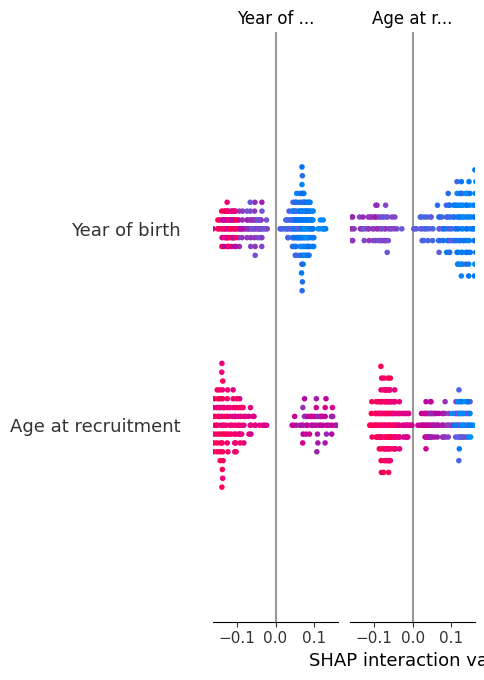

In [23]:
shap.summary_plot(shap_values_rf, X_test_df)


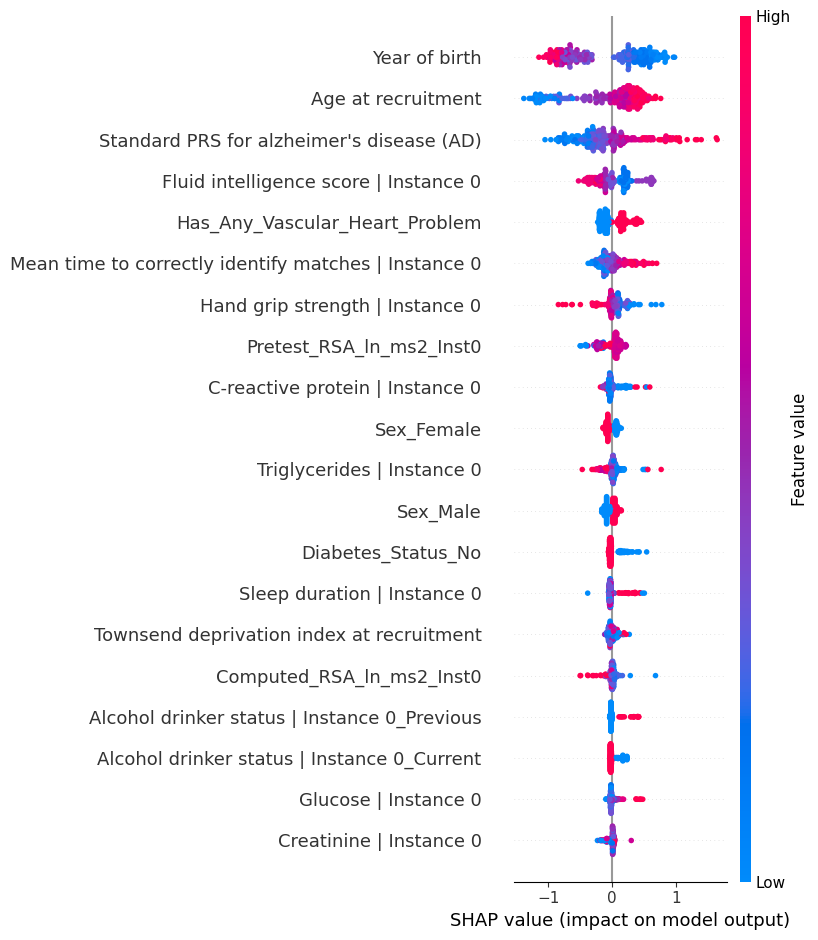

In [24]:
shap.summary_plot(shap_values_gb, X_test_df)


# Ablations

#####  RFE with Best Models but no RSA features included (All metrics)

In [26]:
#  Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

#  Define estimators
estimators = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

feature_names = np.array(features_names_no_rsa) 

# 🔹 Model evaluation function
def evaluate_model_scoring(X_train, y_train, X_val, y_val, X_test, y_test, feature_names, name, base_est, scoring, cv):
    est_copy = deepcopy(base_est)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('fs', RFECV(estimator=est_copy, step=1, cv=cv, scoring=scoring, n_jobs=-1)),
        ('clf', est_copy)
    ])
    pipe.fit(X_train, y_train)

    support = pipe.named_steps['fs'].support_
    n_features = support.sum()
    
    feature_names = np.array(features_names_no_rsa) 
    selected = feature_names[support].tolist()

    def compute_metrics(X, y, dataset):
        y_pred = pipe.predict(X)
        y_score = pipe.predict_proba(X)[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(X)
        auc = roc_auc_score(y, y_score) if y_score is not None else np.nan
        rep = classification_report(y, y_pred, output_dict=True, zero_division=0).get('1', {})
        kappa = cohen_kappa_score(y, y_pred)
        
        
        # Print class distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        print(f"\n🔹 {dataset} predicted class distribution:")
        for cls, cnt in zip(unique, counts):
            print(f"Class {cls}: {cnt} samples")

        return {
            'Dataset': dataset,
            'Scoring': scoring,
            'Model': name,
            'Accuracy': accuracy_score(y, y_pred),
            'ROC-AUC': auc,
            'Precision': rep.get('precision', np.nan),
            'Recall': rep.get('recall', np.nan),
            'F1 Score': rep.get('f1-score', np.nan),
            'Cohen Kappa': kappa,
            'n_features': n_features,
            'features': selected
        }

    return (
        compute_metrics(X_train, y_train, 'Train'),
        compute_metrics(X_val, y_val, 'Validation'),
        compute_metrics(X_test, y_test, 'Test')
    )

# 🔹 Parallel model runs
def run_models_parallel(X_train, y_train, X_val, y_val, X_test, y_test,
                        feature_names, estimators, cv,
                        scorings=['accuracy', 'f1', 'precision', 'roc_auc'],
                        output_dir='results_parallel'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_model_scoring)(
            X_train, y_train, X_val, y_val, X_test, y_test,
            feature_names, name, model, scoring, cv
        )
        for scoring in scorings
        for name, model in estimators.items()
    )

    # Unpack results
    train_records, val_records, test_records = zip(*results)
    train_df = pd.DataFrame(train_records)
    val_df = pd.DataFrame(val_records)
    test_df = pd.DataFrame(test_records)

    # Save outputs
    train_df.to_csv(os.path.join(output_dir, 'train_best_models_no_rsa_results_parallel.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, 'validation_best_models_no_rsa_results_parallel.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test_results_best_models_no_rsa_parallel.csv'), index=False)

    # Display outputs
    print("\n✅ Training Set Performance")
    display(train_df.style.set_caption("Training Set Performance (Parallel)"))
    print("\n✅ Validation Set Performance")
    display(val_df.style.set_caption("Validation Set Performance (Parallel)"))
    print("\n✅ Test Set Performance")
    display(test_df.style.set_caption("Test Set Performance (Parallel)"))

    return train_df, val_df, test_df

# 🔹 Run models
train_df, val_df, test_df = run_models_parallel(
    X_train_no_rsa, y_train,
    X_val_no_rsa, y_val,
    X_test_no_rsa, y_test,
    features_names_no_rsa,
    estimators,
    cv,
    scorings=['accuracy', 'f1', 'precision', 'roc_auc'],
    output_dir='Best_models_no_rsa_results_parallel_run'
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 120 samples
Class 1: 158 samples

🔹 Test predicted class distribution:
Class 0: 129 samples
Class 1: 149 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 120 samples
Class 1: 158 samples

🔹 Test predicted class distribution:
Class 0: 129 samples
Class 1: 149 samples


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 10.0min remaining: 29.9min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 116 samples
Class 1: 162 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples


[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed: 10.0min remaining: 16.7min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 114 samples
Class 1: 164 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples


[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed: 10.0min remaining: 10.0min



🔹 Train predicted class distribution:
Class 0: 612 samples
Class 1: 685 samples

🔹 Validation predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Test predicted class distribution:
Class 0: 140 samples
Class 1: 138 samples


[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed: 10.1min remaining:  6.1min



🔹 Train predicted class distribution:
Class 0: 612 samples
Class 1: 685 samples

🔹 Validation predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Test predicted class distribution:
Class 0: 140 samples
Class 1: 138 samples


[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed: 10.1min remaining:  3.4min



🔹 Train predicted class distribution:
Class 0: 608 samples
Class 1: 689 samples

🔹 Validation predicted class distribution:
Class 0: 124 samples
Class 1: 154 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Train predicted class distribution:
Class 0: 608 samples
Class 1: 689 samples

🔹 Validation predicted class distribution:
Class 0: 124 samples
Class 1: 154 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

✅ Training Set Performance


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 10.2min finished


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Train,accuracy,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Prefer not to answer', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Train,accuracy,Gradient Boosting,0.871241,0.947731,0.856934,0.894817,0.875466,0.742315,39,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Alcoh


✅ Validation Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Validation,accuracy,Random Forest,0.751799,0.808511,0.727848,0.815603,0.769231,0.502619,59,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Prefer not to answer', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Validation,accuracy,Gradient Boosting,0.715827,0.789149,0.698718,0.773050,0.734007,0.430653,39,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previou


✅ Test Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Test,accuracy,Random Forest,0.730216,0.821429,0.718121,0.764286,0.740484,0.460152,59,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Prefer not to answer', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Test,accuracy,Gradient Boosting,0.705036,0.810455,0.710145,0.700000,0.705036,0.410102,39,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol

#####  RFE with Best Models but no RSA features included (Cohen's Kappa Scoring)

In [28]:
from sklearn.metrics import make_scorer, cohen_kappa_score

# Define custom scorer
cohen_kappa_scorer = make_scorer(cohen_kappa_score)


# 🔹 Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# 🔹 Define estimators
estimators = {
   
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
   
}

feature_names = np.array(features_names_no_rsa)  

# 🔹 Model evaluation function
def evaluate_model_scoring(X_train, y_train, X_val, y_val, X_test, y_test, feature_names, name, base_est, scoring, cv):
    est_copy = deepcopy(base_est)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('fs', RFECV(estimator=est_copy, step=1, cv=cv, scoring=cohen_kappa_scorer, n_jobs=-1)),
        ('clf', est_copy)
    ])
    pipe.fit(X_train, y_train)

    support = pipe.named_steps['fs'].support_
    n_features = support.sum()
    
    feature_names = np.array(feature_names)  # Ensure it's a NumPy array
    selected = feature_names[support].tolist()

    def compute_metrics(X, y, dataset):
        y_pred = pipe.predict(X)
        y_score = pipe.predict_proba(X)[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(X)
        auc = roc_auc_score(y, y_score) if y_score is not None else np.nan
        rep = classification_report(y, y_pred, output_dict=True, zero_division=0).get('1', {})
        kappa = cohen_kappa_score(y, y_pred)
        
        # 🔹 Print class distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        print(f"\n🔹 {dataset} predicted class distribution:")
        for cls, cnt in zip(unique, counts):
            print(f"Class {cls}: {cnt} samples")

        return {
            'Dataset': dataset,
            'Scoring': scoring,
            'Model': name,
            'Accuracy': accuracy_score(y, y_pred),
            'ROC-AUC': auc,
            'Precision': rep.get('precision', np.nan),
            'Recall': rep.get('recall', np.nan),
            'F1 Score': rep.get('f1-score', np.nan),
            'Cohen Kappa': kappa,
            'n_features': n_features,
            'features': selected
        }

    return (
        compute_metrics(X_train, y_train, 'Train'),
        compute_metrics(X_val, y_val, 'Validation'),
        compute_metrics(X_test, y_test, 'Test')
    )

# 🔹 Parallel model runs for only Cohen’s kappa
def run_models_parallel_kappa(X_train, y_train, X_val, y_val, X_test, y_test,
                        feature_names, estimators, cv,
                        output_dir='results_parallel'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_model_scoring)(
            X_train, y_train, X_val, y_val, X_test, y_test,
            feature_names, name, model, scoring='cohen_kappa', cv=cv
        )
        for name, model in estimators.items()
    )

    # Unpack results
    train_records, val_records, test_records = zip(*results)
    train_df = pd.DataFrame(train_records)
    val_df = pd.DataFrame(val_records)
    test_df = pd.DataFrame(test_records)

    # Save outputs
    train_df.to_csv(os.path.join(output_dir, 'train_no_rsa_cohens_kappa_results_parallel.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, 'validation_no_rsa_cohens_kappa_esults_parallel.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test_no_rsa_cohens_kappa_results_parallel.csv'), index=False)

    # Display outputs
    print("\n✅ Training Set Performance")
    display(train_df.style.set_caption("Training Set Performance (Parallel)"))
    print("\n✅ Validation Set Performance")
    display(val_df.style.set_caption("Validation Set Performance (Parallel)"))
    print("\n✅ Test Set Performance")
    display(test_df.style.set_caption("Test Set Performance (Parallel)"))

    return train_df, val_df, test_df

# 🔹 Run models with only Cohen’s kappa
train_df, val_df, test_df = run_models_parallel_kappa(
    X_train_no_rsa, y_train,
    X_val_no_rsa, y_val,
    X_test_no_rsa, y_test,
    features_names_no_rsa,
    estimators,
    cv,
    output_dir='No_rsa_cohens_kappa_results_parallel_run_kappa'
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



🔹 Train predicted class distribution:
Class 0: 612 samples
Class 1: 685 samples

🔹 Validation predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Test predicted class distribution:
Class 0: 140 samples
Class 1: 138 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 120 samples
Class 1: 158 samples

🔹 Test predicted class distribution:
Class 0: 129 samples
Class 1: 149 samples

✅ Training Set Performance


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  3.7min finished


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Train,cohen_kappa,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Prefer not to answer', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Train,cohen_kappa,Gradient Boosting,0.871241,0.947731,0.856934,0.894817,0.875466,0.742315,39,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 


✅ Validation Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Validation,cohen_kappa,Random Forest,0.751799,0.808511,0.727848,0.815603,0.769231,0.502619,59,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Prefer not to answer', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Validation,cohen_kappa,Gradient Boosting,0.715827,0.789149,0.698718,0.773050,0.734007,0.430653,39,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_P


✅ Test Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Test,cohen_kappa,Random Forest,0.730216,0.821429,0.718121,0.764286,0.740484,0.460152,59,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Prefer not to answer', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Prefer not to answer', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Test,cohen_kappa,Gradient Boosting,0.705036,0.810455,0.710145,0.700000,0.705036,0.410102,39,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'A

#####  RFE with MLP but no RSA features included (All metrics Scoring)

In [29]:


def mlp_feature_importance(estimator):
    return np.abs(estimator.coefs_[0]).mean(axis=1)

def run_mlp_rfe_pipeline_multi_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                                       feature_names, cv, output_dir='mlp_rfe_results',
                                       hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42,
                                       scorings=['accuracy', 'precision', 'roc_auc', 'f1']):

    os.makedirs(output_dir, exist_ok=True)

    all_val_results = []
    all_test_results = []
    all_train_results = []

    for scoring in scorings:
        print(f"\n🔹 Running RFECV with scoring = {scoring}")

        # Define MLP estimator
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=random_state,
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1
        )

        # RFECV with current scoring
        rfecv = RFECV(
            estimator=mlp,
            step=1,
            cv=cv,
            scoring=scoring,
            importance_getter=mlp_feature_importance
        )

        # Pipeline
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfecv),
            ('classifier', MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=max_iter,
                random_state=random_state,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1
            ))
        ])

        # Fit on training data
        pipe.fit(X_train, y_train)

        # Extract selected features
        support = pipe.named_steps['rfe'].support_
        selected_feats = np.array(features_names_no_rsa)[support].tolist()
        n_selected = support.sum()

        print(f"✅ [{scoring}] MLP-RFE selected {n_selected} features:")
        for f in selected_feats:
            print("   •", f)

        # Define evaluation function
        def eval_split(X, y, split_name):
            X_sel = pipe.named_steps['scaler'].transform(X)[:, support]
            y_pred = pipe.named_steps['classifier'].predict(X_sel)
            y_proba = pipe.named_steps['classifier'].predict_proba(X_sel)[:, 1]

            # Print class distribution
            unique, counts = np.unique(y_pred, return_counts=True)
            print(f"\n🔹 [{scoring}] {split_name} predicted class distribution:")
            for cls, cnt in zip(unique, counts):
                print(f"Class {cls}: {cnt} samples")

            return {
                'Scoring': scoring,
                'Split': split_name,
                'Accuracy': accuracy_score(y, y_pred),
                'Precision': precision_score(y, y_pred, zero_division=0),
                'Recall': recall_score(y, y_pred, zero_division=0),
                'ROC-AUC': roc_auc_score(y, y_proba),
                'F1 Score': f1_score(y, y_pred, zero_division=0),
                'Cohen Kappa': cohen_kappa_score(y, y_pred),
                'n_features': n_selected,
                'features': "; ".join(selected_feats)
            }

        # Evaluate on validation and test sets
        all_train_results.append(eval_split(X_train, y_train, 'Training'))
        all_val_results.append(eval_split(X_val, y_val, 'Validation'))
        all_test_results.append(eval_split(X_test, y_test, 'Test'))

    # Create DataFrames
    train_df = pd.DataFrame(all_train_results)
    val_df = pd.DataFrame(all_val_results)
    test_df = pd.DataFrame(all_test_results)

    # Save results
    train_path = os.path.join(output_dir, 'train_mlp_no_rsa_rfe_multi_scoring.csv')
    val_path = os.path.join(output_dir, 'validation_mlp_rno_rsa_fe_multi_scoring.csv')
    test_path = os.path.join(output_dir, 'test_mlp_no_rsa_rfe_multi_scoring.csv')
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"\n📁 All results saved to:\n  📄 {train_path}\n  📄 {val_path}\n  📄 {test_path}\n")

    display(train_df.style.set_caption("📊 MLP-RFE Training Results (Multiple Scorings)"))
    display(val_df.style.set_caption("📊 MLP-RFE Validation Results (Multiple Scorings)"))
    display(test_df.style.set_caption("📊 MLP-RFE Test Results (Multiple Scorings)"))

    return train_df, val_df, test_df

# 🔹 Run the updated pipeline
train_mlp_df, val_mlp_df, test_mlp_df = run_mlp_rfe_pipeline_multi_scoring(
    X_train_no_rsa, y_train,
    X_val_no_rsa, y_val,
    X_test_no_rsa, y_test,
    feature_names=features_names_no_rsa,
    cv=cv,
    output_dir='no_rsa_mlp_rfe_results_multi_scoring',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    scorings=['accuracy', 'precision', 'roc_auc', 'f1']
)



🔹 Running RFECV with scoring = accuracy
✅ [accuracy] MLP-RFE selected 18 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Diabetes_Status_Prefer not to answer
   • Diabetes_Status_Yes
   • Smoking status | Instance 0_Never
   • Smoking status | Instance 0_Prefer not to answer
   • Alcohol drinker status | Instance 0_Current
   • Alcohol drinker status | Instance 0_Prefer not to answer
   • Alcohol intake frequency. | Instance 0_Never
   • Bipolar and major depression status | Instance 0_Single Probable major depression episode

🔹 [accuracy] Training predicted class distribution:
Class 0: 510 samples
Class 1: 787 samples

🔹 [accuracy] Validation predicted class distribution:
Class 0: 104 samples
Class 1: 174 samples

🔹 [accuracy] 

/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

✅ [precision] MLP-RFE selected 20 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Diabetes_Status_Prefer not to answer
   • Diabetes_Status_Yes
   • Smoking status | Instance 0_Never
   • Smoking status | Instance 0_Prefer not to answer
   • Alcohol drinker status | Instance 0_Current
   • Alcohol drinker status | Instance 0_Prefer not to answer
   • Alcohol intake frequency. | Instance 0_Never
   • Bipolar and major depression status | Instance 0_Bipolar I Disorder
   • Bipolar and major depression status | Instance 0_Bipolar II Disorder
   • Bipolar and major depression status | Instance 0_Single Probable major depression episode

🔹 [precision] Training predicted class distribution:
Class 0: 550 samples
Class 1: 747 samples

🔹 

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Training,0.747880,0.709022,0.850610,0.829913,0.773389,0.494511,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode
1,precision,Training,0.761758,0.732262,0.833841,0.835456,0.779758,0.522677,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Bipolar II Disorder; Bipolar and major depression status | Instance 0_Single Probable major depression episode
2,roc_auc,Training,0.747880,0.709022,0.850610,0.829913,0.773389,0.494511,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode
3,f1,Training,0.747880,0.709022,0.850610,0.829913,0.773389,0.494511,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Validation,0.708633,0.672414,0.829787,0.795620,0.742857,0.415147,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode
1,precision,Validation,0.708633,0.680723,0.801418,0.803748,0.736156,0.415633,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Bipolar II Disorder; Bipolar and major depression status | Instance 0_Single Probable major depression episode
2,roc_auc,Validation,0.708633,0.672414,0.829787,0.795620,0.742857,0.415147,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode
3,f1,Validation,0.708633,0.672414,0.829787,0.795620,0.742857,0.415147,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Test,0.719424,0.686747,0.814286,0.793271,0.745098,0.438064,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode
1,precision,Test,0.737410,0.724832,0.771429,0.818064,0.747405,0.474548,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Bipolar II Disorder; Bipolar and major depression status | Instance 0_Single Probable major depression episode
2,roc_auc,Test,0.719424,0.686747,0.814286,0.793271,0.745098,0.438064,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode
3,f1,Test,0.719424,0.686747,0.814286,0.793271,0.745098,0.438064,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode


#####  RFE with MLP but no RSA features included (Cohen's Kappa Scoring)

In [30]:

def mlp_feature_importance(estimator):
    return np.abs(estimator.coefs_[0]).mean(axis=1)

def run_mlp_rfe_pipeline_multi_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                                       feature_names, cv, output_dir='mlp_rfe_results',
                                       hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42,
                                       scorings=['accuracy', 'precision', 'roc_auc', 'f1', 'cohen_kappa']):

    os.makedirs(output_dir, exist_ok=True)
    all_train_results = []
    all_val_results = []
    all_test_results = []

    for scoring in scorings:
        print(f"\n🔹 Running RFECV with scoring = {scoring}")

        # Define MLP estimator
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=random_state,
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1
        )

        # 🔹 Define custom scorer for Cohen's Kappa
        if scoring == 'cohen_kappa':
            scorer = make_scorer(cohen_kappa_score)
        else:
            scorer = scoring

        # RFECV with current scoring
        rfecv = RFECV(
            estimator=mlp,
            step=1,
            cv=cv,
            scoring=scorer,
            importance_getter=mlp_feature_importance
        )

        # Pipeline
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfecv),
            ('classifier', MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=max_iter,
                random_state=random_state,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1
            ))
        ])

        # Fit on training data
        pipe.fit(X_train, y_train)

        # Extract selected features
        support = pipe.named_steps['rfe'].support_
        selected_feats = np.array(features_names_no_rsa)[support].tolist()
        n_selected = support.sum()

        print(f"✅ [{scoring}] MLP-RFE selected {n_selected} features:")
        for f in selected_feats:
            print("   •", f)

        # Evaluation function
        def eval_split(X, y, split_name):
            X_sel = pipe.named_steps['scaler'].transform(X)[:, support]
            y_pred = pipe.named_steps['classifier'].predict(X_sel)
            y_proba = pipe.named_steps['classifier'].predict_proba(X_sel)[:, 1]

            # Print class distribution
            unique, counts = np.unique(y_pred, return_counts=True)
            print(f"\n🔹 [{scoring}] {split_name} predicted class distribution:")
            for cls, cnt in zip(unique, counts):
                print(f"Class {cls}: {cnt} samples")

            return {
                'Scoring': scoring,
                'Split': split_name,
                'Accuracy': accuracy_score(y, y_pred),
                'Precision': precision_score(y, y_pred, zero_division=0),
                'Recall': recall_score(y, y_pred, zero_division=0),
                'ROC-AUC': roc_auc_score(y, y_proba),
                'F1 Score': f1_score(y, y_pred, zero_division=0),
                'Cohen Kappa': cohen_kappa_score(y, y_pred),
                'n_features': n_selected,
                'features': "; ".join(selected_feats)
            }

        # Evaluate on validation and test sets
        all_train_results.append(eval_split(X_train, y_train, 'Validation'))
        all_val_results.append(eval_split(X_val, y_val, 'Validation'))
        all_test_results.append(eval_split(X_test, y_test, 'Test'))

    # Create DataFrames
    train_df = pd.DataFrame(all_train_results)
    val_df = pd.DataFrame(all_val_results)
    test_df = pd.DataFrame(all_test_results)

    # Save results
    train_path = os.path.join(output_dir, 'train_mlp_no_rsa_kappa_rfe.csv')
    val_path = os.path.join(output_dir, 'validation_mlp_no_rsa_kappa_rfe.csv')
    test_path = os.path.join(output_dir, 'test_mlp_rfe_no_rsa_kappa.csv')
    train_df.to_csv(train_path, index=False)
    val_df['Model'] = 'MLP-RFE'
    test_df['Model'] = 'MLP-RFE'
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"\n📁 All results saved to:\n  📄 {val_path}\n  📄 {test_path}\n")

    display(val_df.style.set_caption("📊 MLP-RFE Validation Results (Multiple Scorings)"))
    display(test_df.style.set_caption("📊 MLP-RFE Test Results (Multiple Scorings)"))

    return val_df, test_df

# 🔹 Run the updated pipeline
val_mlp_df, test_mlp_df = run_mlp_rfe_pipeline_multi_scoring(
    X_train_no_rsa, y_train,
    X_val_no_rsa, y_val,
    X_test_no_rsa, y_test,
    feature_names=features_names_no_rsa,
    cv=cv,
    output_dir='mlp_no_rsa_rfe_results_cohen_kappa',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    scorings=['cohen_kappa']
)



🔹 Running RFECV with scoring = cohen_kappa
✅ [cohen_kappa] MLP-RFE selected 18 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Diabetes_Status_Prefer not to answer
   • Diabetes_Status_Yes
   • Smoking status | Instance 0_Never
   • Smoking status | Instance 0_Prefer not to answer
   • Alcohol drinker status | Instance 0_Current
   • Alcohol drinker status | Instance 0_Prefer not to answer
   • Alcohol intake frequency. | Instance 0_Never
   • Bipolar and major depression status | Instance 0_Single Probable major depression episode

🔹 [cohen_kappa] Validation predicted class distribution:
Class 0: 510 samples
Class 1: 787 samples

🔹 [cohen_kappa] Validation predicted class distribution:
Class 0: 104 samples
Class 1: 174 samples


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features,Model
0,cohen_kappa,Validation,0.708633,0.672414,0.829787,0.795620,0.742857,0.415147,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode,MLP-RFE


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features,Model
0,cohen_kappa,Test,0.719424,0.686747,0.814286,0.793271,0.745098,0.438064,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Single Probable major depression episode,MLP-RFE


### Shap Values (No RSA)

In [39]:

# Fit models correctly
rf = RandomForestClassifier().fit(X_train_no_rsa, y_train)
gb = GradientBoostingClassifier().fit(X_train_no_rsa, y_train)



# Ensure it's a DataFrame (should be already)
X_test_df = pd.DataFrame(X_test_no_rsa, columns=features_names_no_rsa)  # Optional, only needed if X_test_clean isn't already a DataFrame

# For tree-based models
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test_df)

explainer_gb = shap.TreeExplainer(gb)
shap_values_gb = explainer_gb.shap_values(X_test_df)

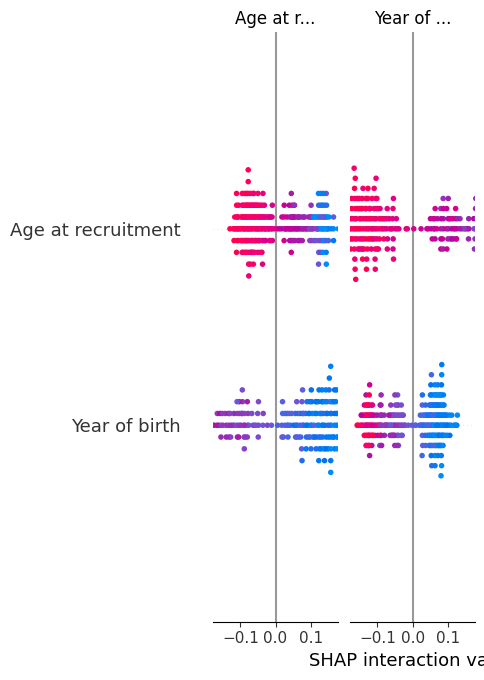

In [40]:
# For binary classification, pick class 1 (typically positive class)
shap.summary_plot(shap_values_rf, X_test_df)


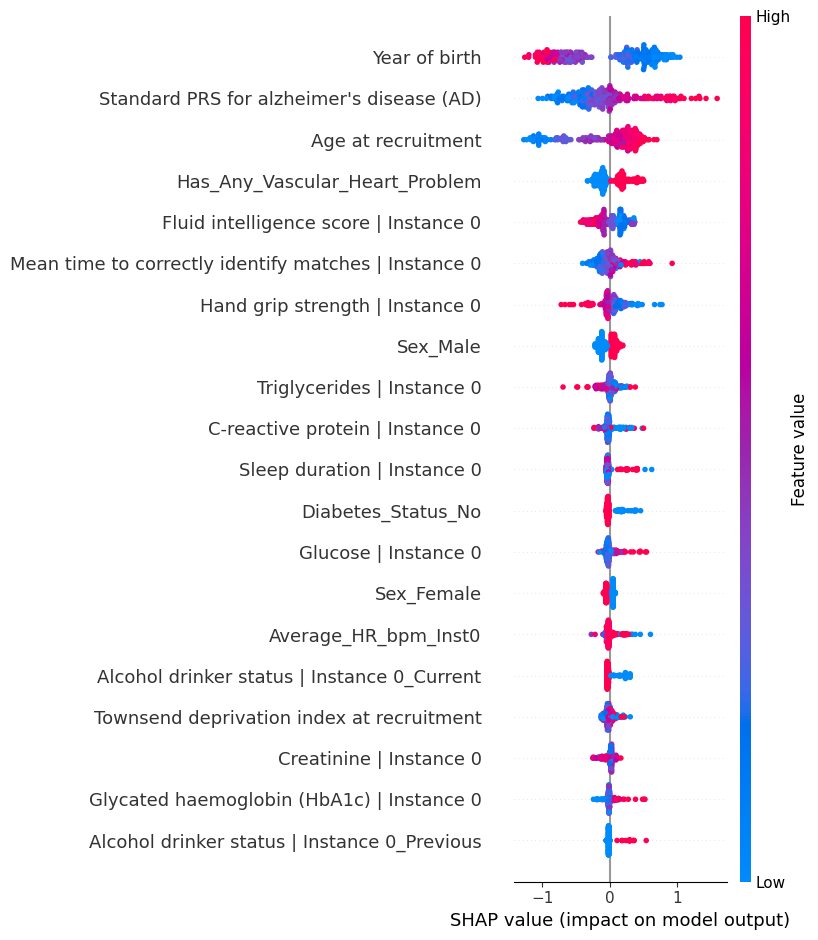

In [41]:
# For GB (usually returns single matrix)
shap.summary_plot(shap_values_gb, X_test_df)

#####  RFE with Best Models No RSA features and Gate Speed included (All Metrics Scoring)


In [45]:
#  Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

#  Define estimators
estimators = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

feature_names = np.array(features_names_no_rsa_and_gate_speed) 

# 🔹 Model evaluation function
def evaluate_model_scoring(X_train, y_train, X_val, y_val, X_test, y_test, feature_names, name, base_est, scoring, cv):
    est_copy = deepcopy(base_est)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('fs', RFECV(estimator=est_copy, step=1, cv=cv, scoring=scoring, n_jobs=-1)),
        ('clf', est_copy)
    ])
    pipe.fit(X_train, y_train)

    support = pipe.named_steps['fs'].support_
    n_features = support.sum()
    
    feature_names = np.array(feature_names)
    selected = feature_names[support].tolist()

    def compute_metrics(X, y, dataset):
        y_pred = pipe.predict(X)
        y_score = pipe.predict_proba(X)[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(X)
        auc = roc_auc_score(y, y_score) if y_score is not None else np.nan
        rep = classification_report(y, y_pred, output_dict=True, zero_division=0).get('1', {})
        kappa = cohen_kappa_score(y, y_pred)
        
        
        # Print class distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        print(f"\n🔹 {dataset} predicted class distribution:")
        for cls, cnt in zip(unique, counts):
            print(f"Class {cls}: {cnt} samples")

        return {
            'Dataset': dataset,
            'Scoring': scoring,
            'Model': name,
            'Accuracy': accuracy_score(y, y_pred),
            'ROC-AUC': auc,
            'Precision': rep.get('precision', np.nan),
            'Recall': rep.get('recall', np.nan),
            'F1 Score': rep.get('f1-score', np.nan),
            'Cohen Kappa': kappa,
            'n_features': n_features,
            'features': selected
        }

    return (
        compute_metrics(X_train, y_train, 'Train'),
        compute_metrics(X_val, y_val, 'Validation'),
        compute_metrics(X_test, y_test, 'Test')
    )

# 🔹 Parallel model runs
def run_models_parallel(X_train, y_train, X_val, y_val, X_test, y_test,
                        feature_names, estimators, cv,
                        scorings=['accuracy', 'f1', 'precision', 'roc_auc'],
                        output_dir='results_parallel'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_model_scoring)(
            X_train, y_train, X_val, y_val, X_test, y_test,
            feature_names, name, model, scoring, cv
        )
        for scoring in scorings
        for name, model in estimators.items()
    )

    # Unpack results
    train_records, val_records, test_records = zip(*results)
    train_df = pd.DataFrame(train_records)
    val_df = pd.DataFrame(val_records)
    test_df = pd.DataFrame(test_records)

    # Save outputs
    train_df.to_csv(os.path.join(output_dir, 'train_best_models_no_rsa_and_gate_speed_results_parallel.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, 'validation_best_models_no_rsa_and_gate_speed_results_parallel.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test_results_best_models_no_rsa_and_gate_speed_parallel.csv'), index=False)

    # Display outputs
    print("\n✅ Training Set Performance")
    display(train_df.style.set_caption("Training Set Performance (Parallel)"))
    print("\n✅ Validation Set Performance")
    display(val_df.style.set_caption("Validation Set Performance (Parallel)"))
    print("\n✅ Test Set Performance")
    display(test_df.style.set_caption("Test Set Performance (Parallel)"))

    return train_df, val_df, test_df

# 🔹 Run models
train_df, val_df, test_df = run_models_parallel(
    X_train_no_rsa_but_gate_speed, y_train,
    X_val_no_rsa_but_gate_speed, y_val,
    X_test_no_rsa_but_gate_speed, y_test,
    features_names_no_rsa_and_gate_speed,
    estimators,
    cv,
    scorings=['accuracy', 'f1', 'precision', 'roc_auc'],
    output_dir='Best_models_no_rsa_and_gate_speed_results_parallel_run'
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  9.9min remaining: 29.6min
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:  9.9min remaining: 16.4min
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:  9.9min remaining:  9.9min



🔹 Train predicted class distribution:
Class 0: 613 samples
Class 1: 684 samples

🔹 Validation predicted class distribution:
Class 0: 124 samples
Class 1: 154 samples

🔹 Test predicted class distribution:
Class 0: 140 samples
Class 1: 138 samples


[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed: 10.0min remaining:  6.0min



🔹 Train predicted class distribution:
Class 0: 605 samples
Class 1: 692 samples

🔹 Validation predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples

🔹 Test predicted class distribution:
Class 0: 141 samples
Class 1: 137 samples


[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed: 10.0min remaining:  3.3min



🔹 Train predicted class distribution:
Class 0: 604 samples
Class 1: 693 samples

🔹 Validation predicted class distribution:
Class 0: 128 samples
Class 1: 150 samples

🔹 Test predicted class distribution:
Class 0: 135 samples
Class 1: 143 samples

🔹 Train predicted class distribution:
Class 0: 604 samples
Class 1: 693 samples

🔹 Validation predicted class distribution:
Class 0: 128 samples
Class 1: 150 samples

🔹 Test predicted class distribution:
Class 0: 135 samples
Class 1: 143 samples

✅ Training Set Performance


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 10.1min finished


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Train,accuracy,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0']"
1,Train,accuracy,Gradient Boosting,0.869699,0.948309,0.851371,0.899390,0.874722,0.739192,28,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Hand grip strength | Instance 0']"
2,Train,f1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | In


✅ Validation Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Validation,accuracy,Random Forest,0.737410,0.802143,0.717949,0.794326,0.754209,0.473894,46,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0']"
1,Validation,accuracy,Gradient Boosting,0.715827,0.780401,0.706667,0.751773,0.728522,0.431007,28,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Hand grip strength | Instance 0']"
2,Validation,f1,Random Forest,0.737410,0.802143,0.717949,0.794326,0.754209,0.473894,46,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglob


✅ Test Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Test,accuracy,Random Forest,0.719424,0.805228,0.698718,0.778571,0.736486,0.438355,46,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0']"
1,Test,accuracy,Gradient Boosting,0.723022,0.816718,0.720280,0.735714,0.727915,0.445928,28,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Hand grip strength | Instance 0']"
2,Test,f1,Random Forest,0.719424,0.805228,0.698718,0.778571,0.736486,0.438355,46,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Insta

#####  RFE with Best Models No RSA features and Gate Speed included (Cohen's Kappa Scoring)


In [46]:
from sklearn.metrics import make_scorer, cohen_kappa_score

# Define custom scorer
cohen_kappa_scorer = make_scorer(cohen_kappa_score)


# 🔹 Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# 🔹 Define estimators
estimators = {
   
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
   
}

feature_names = np.array(features_names_no_rsa_and_gate_speed)  

# 🔹 Model evaluation function
def evaluate_model_scoring(X_train, y_train, X_val, y_val, X_test, y_test, feature_names, name, base_est, scoring, cv):
    est_copy = deepcopy(base_est)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('fs', RFECV(estimator=est_copy, step=1, cv=cv, scoring=cohen_kappa_scorer, n_jobs=-1)),
        ('clf', est_copy)
    ])
    pipe.fit(X_train, y_train)

    support = pipe.named_steps['fs'].support_
    n_features = support.sum()
    
    feature_names = np.array(feature_names)
    selected = feature_names[support].tolist()

    def compute_metrics(X, y, dataset):
        y_pred = pipe.predict(X)
        y_score = pipe.predict_proba(X)[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(X)
        auc = roc_auc_score(y, y_score) if y_score is not None else np.nan
        rep = classification_report(y, y_pred, output_dict=True, zero_division=0).get('1', {})
        kappa = cohen_kappa_score(y, y_pred)
        
        # 🔹 Print class distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        print(f"\n🔹 {dataset} predicted class distribution:")
        for cls, cnt in zip(unique, counts):
            print(f"Class {cls}: {cnt} samples")

        return {
            'Dataset': dataset,
            'Scoring': scoring,
            'Model': name,
            'Accuracy': accuracy_score(y, y_pred),
            'ROC-AUC': auc,
            'Precision': rep.get('precision', np.nan),
            'Recall': rep.get('recall', np.nan),
            'F1 Score': rep.get('f1-score', np.nan),
            'Cohen Kappa': kappa,
            'n_features': n_features,
            'features': selected
        }

    return (
        compute_metrics(X_train, y_train, 'Train'),
        compute_metrics(X_val, y_val, 'Validation'),
        compute_metrics(X_test, y_test, 'Test')
    )

# 🔹 Parallel model runs for only Cohen’s kappa
def run_models_parallel(X_train, y_train, X_val, y_val, X_test, y_test,
                        feature_names, estimators, cv,
                        output_dir='results_parallel'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_model_scoring)(
            X_train, y_train, X_val, y_val, X_test, y_test,
            feature_names, name, model, scoring='cohen_kappa', cv=cv
        )
        for name, model in estimators.items()
    )

    # Unpack results
    train_records, val_records, test_records = zip(*results)
    train_df = pd.DataFrame(train_records)
    val_df = pd.DataFrame(val_records)
    test_df = pd.DataFrame(test_records)

    # Save outputs
    train_df.to_csv(os.path.join(output_dir, 'train_no_rsa_and_gate_speed_cohens_kappa_results_parallel.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, 'validation_no_rsa_and_gate_speed_cohens_kappa_esults_parallel.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test_no_rsa_and_gate_speed_cohens_kappa_results_parallel.csv'), index=False)

    # Display outputs
    print("\n✅ Training Set Performance")
    display(train_df.style.set_caption("Training Set Performance (Parallel)"))
    print("\n✅ Validation Set Performance")
    display(val_df.style.set_caption("Validation Set Performance (Parallel)"))
    print("\n✅ Test Set Performance")
    display(test_df.style.set_caption("Test Set Performance (Parallel)"))

    return train_df, val_df, test_df

# 🔹 Run models with only Cohen’s kappa
train_df, val_df, test_df = run_models_parallel(
    X_train_no_rsa_but_gate_speed, y_train,
    X_val_no_rsa_but_gate_speed, y_val,
    X_test_no_rsa_but_gate_speed, y_test,
    features_names_no_rsa_and_gate_speed,
    estimators,
    cv,
    output_dir='No_rsa_and_gate_speed_cohens_kappa_results_parallel_run_kappa'
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



🔹 Train predicted class distribution:
Class 0: 604 samples
Class 1: 693 samples

🔹 Validation predicted class distribution:
Class 0: 128 samples
Class 1: 150 samples

🔹 Test predicted class distribution:
Class 0: 135 samples
Class 1: 143 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

✅ Training Set Performance


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  3.8min finished


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Train,cohen_kappa,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0']"
1,Train,cohen_kappa,Gradient Boosting,0.869699,0.948309,0.851371,0.899390,0.874722,0.739192,28,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Hand grip strength | Instance 0']"



✅ Validation Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Validation,cohen_kappa,Random Forest,0.737410,0.802143,0.717949,0.794326,0.754209,0.473894,46,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0']"
1,Validation,cohen_kappa,Gradient Boosting,0.715827,0.780401,0.706667,0.751773,0.728522,0.431007,28,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Hand grip strength | Instance 0']"



✅ Test Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Test,cohen_kappa,Random Forest,0.719424,0.805228,0.698718,0.778571,0.736486,0.438355,46,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0']"
1,Test,cohen_kappa,Gradient Boosting,0.723022,0.816718,0.720280,0.735714,0.727915,0.445928,28,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Hand grip strength | Instance 0']"


#####  RFE with MLP No RSA features and Gate Speed included (All Metrics Scoring)


In [49]:


def mlp_feature_importance(estimator):
    return np.abs(estimator.coefs_[0]).mean(axis=1)

def run_mlp_rfe_pipeline_multi_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                                       feature_names, cv, output_dir='mlp_rfe_results',
                                       hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42,
                                       scorings=['accuracy', 'precision', 'roc_auc', 'f1']):

    os.makedirs(output_dir, exist_ok=True)

    all_val_results = []
    all_test_results = []
    all_train_results = []

    for scoring in scorings:
        print(f"\n🔹 Running RFECV with scoring = {scoring}")

        # Define MLP estimator
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=random_state,
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1
        )

        # RFECV with current scoring
        rfecv = RFECV(
            estimator=mlp,
            step=1,
            cv=cv,
            scoring=scoring,
            importance_getter=mlp_feature_importance
        )

        # Pipeline
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfecv),
            ('classifier', MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=max_iter,
                random_state=random_state,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1
            ))
        ])

        # Fit on training data
        pipe.fit(X_train, y_train)

        # Extract selected features
        support = pipe.named_steps['rfe'].support_
        selected_feats = np.array(features_names_no_rsa_and_gate_speed)[support].tolist()
        n_selected = support.sum()

        print(f"✅ [{scoring}] MLP-RFE selected {n_selected} features:")
        for f in selected_feats:
            print("   •", f)

        # Define evaluation function
        def eval_split(X, y, split_name):
            X_sel = pipe.named_steps['scaler'].transform(X)[:, support]
            y_pred = pipe.named_steps['classifier'].predict(X_sel)
            y_proba = pipe.named_steps['classifier'].predict_proba(X_sel)[:, 1]

            # Print class distribution
            unique, counts = np.unique(y_pred, return_counts=True)
            print(f"\n🔹 [{scoring}] {split_name} predicted class distribution:")
            for cls, cnt in zip(unique, counts):
                print(f"Class {cls}: {cnt} samples")

            return {
                'Scoring': scoring,
                'Split': split_name,
                'Accuracy': accuracy_score(y, y_pred),
                'Precision': precision_score(y, y_pred, zero_division=0),
                'Recall': recall_score(y, y_pred, zero_division=0),
                'ROC-AUC': roc_auc_score(y, y_proba),
                'F1 Score': f1_score(y, y_pred, zero_division=0),
                'Cohen Kappa': cohen_kappa_score(y, y_pred),
                'n_features': n_selected,
                'features': "; ".join(selected_feats)
            }

        # Evaluate on validation and test sets
        all_train_results.append(eval_split(X_train, y_train, 'Training'))
        all_val_results.append(eval_split(X_val, y_val, 'Validation'))
        all_test_results.append(eval_split(X_test, y_test, 'Test'))

    # Create DataFrames
    train_df = pd.DataFrame(all_train_results)
    val_df = pd.DataFrame(all_val_results)
    test_df = pd.DataFrame(all_test_results)

    # Save results
    train_path = os.path.join(output_dir, 'train_mlp_no_rsa_and_gate_speed_rfe_multi_scoring.csv')
    val_path = os.path.join(output_dir, 'validation_mlp_no_rsa_and_gate_speed_rfe_multi_scoring.csv')
    test_path = os.path.join(output_dir, 'test_mlp_no_rsa_and_gate_speed_rfe_multi_scoring.csv')
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"\n📁 All results saved to:\n  📄 {train_path}\n  📄 {val_path}\n  📄 {test_path}\n")

    display(train_df.style.set_caption("📊 MLP-RFE Training Results (Multiple Scorings)"))
    display(val_df.style.set_caption("📊 MLP-RFE Validation Results (Multiple Scorings)"))
    display(test_df.style.set_caption("📊 MLP-RFE Test Results (Multiple Scorings)"))

    return train_df, val_df, test_df

# 🔹 Run the updated pipeline
train_mlp_df, val_mlp_df, test_mlp_df = run_mlp_rfe_pipeline_multi_scoring(
    X_train_no_rsa_but_gate_speed, y_train,
    X_val_no_rsa_but_gate_speed, y_val,
    X_test_no_rsa_but_gate_speed, y_test,
    feature_names=features_names_no_rsa_and_gate_speed,
    cv=cv,
    output_dir='no_rsa_and_gate_speed_mlp_rfe_results_multi_scoring',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    scorings=['accuracy', 'precision', 'roc_auc', 'f1']
)


🔹 Running RFECV with scoring = accuracy
✅ [accuracy] MLP-RFE selected 18 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_Any_Vascular_Heart_Problem
   • Mean time to correctly identify matches | Instance 0
   • Diabetes_Status_No
   • Diabetes_Status_Prefer not to answer
   • Alcohol drinker status | Instance 0_Current
   • Alcohol drinker status | Instance 0_Never
   • Alcohol intake frequency. | Instance 0_Never
   • Alcohol intake frequency. | Instance 0_Once or twice a week
   • Alcohol intake frequency. | Instance 0_Prefer not to answer
   • Hand grip strength | Instance 0

🔹 [accuracy] Training predicted class distribution:
Class 0: 560 samples
Class 1: 737 samples

🔹 [accuracy] Validation predicted class distribution:
Class 0: 116 samples
Class 1: 162 samples

🔹 [accuracy] Test pre

/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

✅ [precision] MLP-RFE selected 48 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Sleep duration | Instance 0
   • Number of days/week of vigorous physical activity 10+ minutes | Instance 0
   • Number of days/week of moderate physical activity 10+ minutes | Instance 0
   • Mean time to correctly identify matches | Instance 0
   • Fluid intelligence score | Instance 0
   • Cholesterol | Instance 0
   • Triglycerides | Instance 0
   • C-reactive protein | Instance 0
   • Glucose | Instance 0
   • Creatinine | Instance 0
   • Average_HR_bpm_Inst0
   • Average_RR_ms_Inst0
   • Avg_HeartPeriod_ms_Inst0
   • Sex_Female
   • Sex_Male
   • Diabetes_Status_Do not know
   • Diabetes_Status_No
   • Diabetes_Status_Prefer not to answer
   •

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Training,0.763300,0.736771,0.827744,0.838462,0.779612,0.525852,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_Prefer not to answer; Hand grip strength | Instance 0
1,precision,Training,0.731689,0.723837,0.759146,0.812476,0.741071,0.462999,48,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Sleep duration | Instance 0; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Number of days/week of moderate physical activity 10+ minutes | Instance 0; Mean time to correctly identify matches | Instance 0; Fluid intelligence score | Instance 0; Cholesterol | Instance 0; Triglycerides | Instance 0; C-reactive protein | Instance 0; Glucose | Instance 0; Creatinine | Instance 0; Average_HR_bpm_Inst0; Average_RR_ms_Inst0; Avg_HeartPeriod_ms_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Current; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Daily or almost daily; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_One to three times a month; Alcohol intake frequency. | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Three or four times a week; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes; Hand grip strength | Instance 0
2,roc_auc,Training,0.763300,0.736771,0.827744,0.838462,0.779612,0.525852,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_Prefer not to answer; Hand grip strength | Instance 0
3,f1,Training,0.736315,0.684272,0.888720,0.815430,0.773210,0.470708,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Ne

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Validation,0.730216,0.703704,0.808511,0.795569,0.752475,0.459144,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_Prefer not to answer; Hand grip strength | Instance 0
1,precision,Validation,0.687050,0.670886,0.751773,0.749392,0.709030,0.372867,48,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Sleep duration | Instance 0; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Number of days/week of moderate physical activity 10+ minutes | Instance 0; Mean time to correctly identify matches | Instance 0; Fluid intelligence score | Instance 0; Cholesterol | Instance 0; Triglycerides | Instance 0; C-reactive protein | Instance 0; Glucose | Instance 0; Creatinine | Instance 0; Average_HR_bpm_Inst0; Average_RR_ms_Inst0; Avg_HeartPeriod_ms_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Current; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Daily or almost daily; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_One to three times a month; Alcohol intake frequency. | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Three or four times a week; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes; Hand grip strength | Instance 0
2,roc_auc,Validation,0.730216,0.703704,0.808511,0.795569,0.752475,0.459144,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_Prefer not to answer; Hand grip strength | Instance 0
3,f1,Validation,0.708633,0.661290,0.872340,0.776725,0.752294,0.414417,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Insta

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Test,0.741007,0.723684,0.785714,0.808903,0.753425,0.481666,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_Prefer not to answer; Hand grip strength | Instance 0
1,precision,Test,0.687050,0.685315,0.700000,0.761180,0.692580,0.373971,48,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Sleep duration | Instance 0; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Number of days/week of moderate physical activity 10+ minutes | Instance 0; Mean time to correctly identify matches | Instance 0; Fluid intelligence score | Instance 0; Cholesterol | Instance 0; Triglycerides | Instance 0; C-reactive protein | Instance 0; Glucose | Instance 0; Creatinine | Instance 0; Average_HR_bpm_Inst0; Average_RR_ms_Inst0; Avg_HeartPeriod_ms_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Current; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Daily or almost daily; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_One to three times a month; Alcohol intake frequency. | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Three or four times a week; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes; Hand grip strength | Instance 0
2,roc_auc,Test,0.741007,0.723684,0.785714,0.808903,0.753425,0.481666,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_Prefer not to answer; Hand grip strength | Instance 0
3,f1,Test,0.726619,0.686047,0.842857,0.781522,0.756410,0.452302,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Alcohol int

#####  RFE with MLP No RSA features and Gate Speed included (Cohen's Scoring)


In [50]:

def mlp_feature_importance(estimator):
    return np.abs(estimator.coefs_[0]).mean(axis=1)

def run_mlp_rfe_pipeline_kappa_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                                       feature_names, cv, output_dir='mlp_rfe_results',
                                       hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42,
                                       scorings=['accuracy', 'precision', 'roc_auc', 'f1', 'cohen_kappa']):

    os.makedirs(output_dir, exist_ok=True)
    all_train_results = []
    all_val_results = []
    all_test_results = []

    for scoring in scorings:
        print(f"\n🔹 Running RFECV with scoring = {scoring}")

        # Define MLP estimator
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=random_state,
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1
        )

        # 🔹 Define custom scorer for Cohen's Kappa
        if scoring == 'cohen_kappa':
            scorer = make_scorer(cohen_kappa_score)
        else:
            scorer = scoring

        # RFECV with current scoring
        rfecv = RFECV(
            estimator=mlp,
            step=1,
            cv=cv,
            scoring=scorer,
            importance_getter=mlp_feature_importance
        )

        # Pipeline
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfecv),
            ('classifier', MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=max_iter,
                random_state=random_state,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1
            ))
        ])

        # Fit on training data
        pipe.fit(X_train, y_train)

        # Extract selected features
        support = pipe.named_steps['rfe'].support_
        selected_feats = np.array(features_names_no_rsa_and_gate_speed)[support].tolist()
        n_selected = support.sum()

        print(f"✅ [{scoring}] MLP-RFE selected {n_selected} features:")
        for f in selected_feats:
            print("   •", f)

        # Evaluation function
        def eval_split(X, y, split_name):
            X_sel = pipe.named_steps['scaler'].transform(X)[:, support]
            y_pred = pipe.named_steps['classifier'].predict(X_sel)
            y_proba = pipe.named_steps['classifier'].predict_proba(X_sel)[:, 1]

            # Print class distribution
            unique, counts = np.unique(y_pred, return_counts=True)
            print(f"\n🔹 [{scoring}] {split_name} predicted class distribution:")
            for cls, cnt in zip(unique, counts):
                print(f"Class {cls}: {cnt} samples")

            return {
                'Scoring': scoring,
                'Split': split_name,
                'Accuracy': accuracy_score(y, y_pred),
                'Precision': precision_score(y, y_pred, zero_division=0),
                'Recall': recall_score(y, y_pred, zero_division=0),
                'ROC-AUC': roc_auc_score(y, y_proba),
                'F1 Score': f1_score(y, y_pred, zero_division=0),
                'Cohen Kappa': cohen_kappa_score(y, y_pred),
                'n_features': n_selected,
                'features': "; ".join(selected_feats)
            }

        # Evaluate on validation and test sets
        all_train_results.append(eval_split(X_train, y_train, 'Validation'))
        all_val_results.append(eval_split(X_val, y_val, 'Validation'))
        all_test_results.append(eval_split(X_test, y_test, 'Test'))

    # Create DataFrames
    train_df = pd.DataFrame(all_train_results)
    val_df = pd.DataFrame(all_val_results)
    test_df = pd.DataFrame(all_test_results)

    # Save results
    train_path = os.path.join(output_dir, 'train_mlp_no_rsa_and_gate_speed_kappa_rfe.csv')
    val_path = os.path.join(output_dir, 'validation_mlp_no_rsa_and_gate_speed_kappa_rfe.csv')
    test_path = os.path.join(output_dir, 'test_mlp_rfe_no_rsa_and_gate_speed_kappa.csv')
    train_df.to_csv(train_path, index=False)
    val_df['Model'] = 'MLP-RFE'
    test_df['Model'] = 'MLP-RFE'
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"\n📁 All results saved to:\n  📄 {val_path}\n  📄 {test_path}\n")

    display(val_df.style.set_caption("📊 MLP-RFE Validation Results (Multiple Scorings)"))
    display(test_df.style.set_caption("📊 MLP-RFE Test Results (Multiple Scorings)"))

    return val_df, test_df

# 🔹 Run the updated pipeline
val_mlp_df, test_mlp_df = run_mlp_rfe_pipeline_kappa_scoring(
    X_train_no_rsa_but_gate_speed, y_train,
    X_val_no_rsa_but_gate_speed, y_val,
    X_test_no_rsa_but_gate_speed, y_test,
    feature_names=features_names_no_rsa_and_gate_speed,
    cv=cv,
    output_dir='mlp_no_rsa_and_gate_speed_rfe_results_cohen_kappa',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    scorings=['cohen_kappa']
)


🔹 Running RFECV with scoring = cohen_kappa
✅ [cohen_kappa] MLP-RFE selected 18 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_Any_Vascular_Heart_Problem
   • Mean time to correctly identify matches | Instance 0
   • Diabetes_Status_No
   • Diabetes_Status_Prefer not to answer
   • Alcohol drinker status | Instance 0_Current
   • Alcohol drinker status | Instance 0_Never
   • Alcohol intake frequency. | Instance 0_Never
   • Alcohol intake frequency. | Instance 0_Once or twice a week
   • Alcohol intake frequency. | Instance 0_Prefer not to answer
   • Hand grip strength | Instance 0

🔹 [cohen_kappa] Validation predicted class distribution:
Class 0: 560 samples
Class 1: 737 samples

🔹 [cohen_kappa] Validation predicted class distribution:
Class 0: 116 samples
Class 1: 162 samples

🔹 [cohe

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features,Model
0,cohen_kappa,Validation,0.730216,0.703704,0.808511,0.795569,0.752475,0.459144,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_Prefer not to answer; Hand grip strength | Instance 0,MLP-RFE


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features,Model
0,cohen_kappa,Test,0.741007,0.723684,0.785714,0.808903,0.753425,0.481666,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Mean time to correctly identify matches | Instance 0; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_Prefer not to answer; Hand grip strength | Instance 0,MLP-RFE


### Shap Values (NO RSA and Gate Speed)

In [51]:

# Fit models correctly
rf = RandomForestClassifier().fit(X_train_no_rsa_but_gate_speed, y_train)
gb = GradientBoostingClassifier().fit(X_train_no_rsa_but_gate_speed, y_train)


# Ensure it's a DataFrame (should be already)
X_test_df = pd.DataFrame(X_test_no_rsa_but_gate_speed, columns=features_names_no_rsa_and_gate_speed)  # Optional, only needed if X_test_clean isn't already a DataFrame

# For tree-based models
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test_df)

explainer_gb = shap.TreeExplainer(gb)
shap_values_gb = explainer_gb.shap_values(X_test_df)


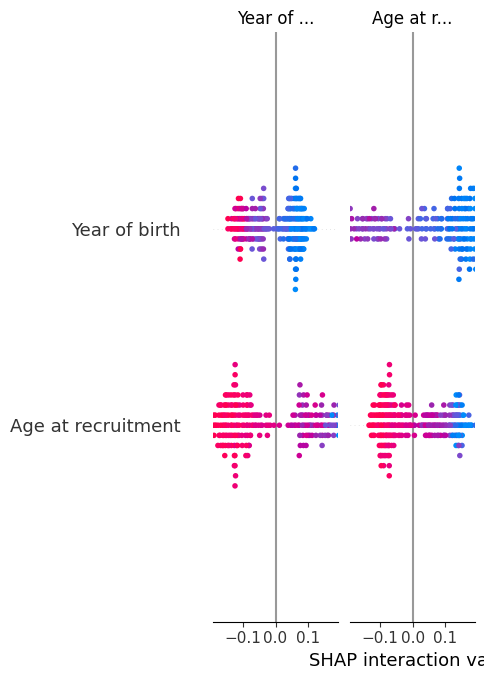

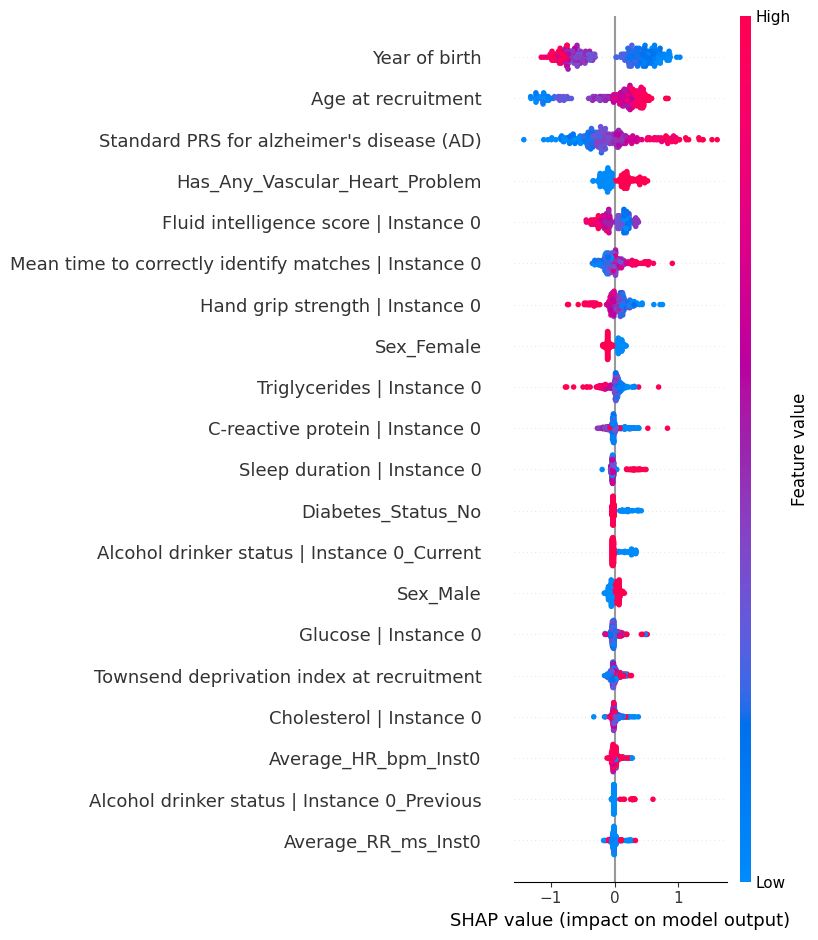

In [52]:
# For binary classification, pick class 1 (typically positive class)
shap.summary_plot(shap_values_rf, X_test_df)

# For GB (usually returns single matrix)
shap.summary_plot(shap_values_gb, X_test_df)

###  RFE with Best Models No RSA features and Grip Strength included (All Metrics Scoring)

In [55]:
#  Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

#  Define estimators
estimators = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

feature_names = np.array(features_names_no_rsa_and_grip_strength) 

# 🔹 Model evaluation function
def evaluate_model_scoring(X_train, y_train, X_val, y_val, X_test, y_test, feature_names, name, base_est, scoring, cv):
    est_copy = deepcopy(base_est)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('fs', RFECV(estimator=est_copy, step=1, cv=cv, scoring=scoring, n_jobs=-1)),
        ('clf', est_copy)
    ])
    pipe.fit(X_train, y_train)

    support = pipe.named_steps['fs'].support_
    n_features = support.sum()
    
    feature_names = np.array(feature_names)
    selected = feature_names[support].tolist()

    def compute_metrics(X, y, dataset):
        y_pred = pipe.predict(X)
        y_score = pipe.predict_proba(X)[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(X)
        auc = roc_auc_score(y, y_score) if y_score is not None else np.nan
        rep = classification_report(y, y_pred, output_dict=True, zero_division=0).get('1', {})
        kappa = cohen_kappa_score(y, y_pred)
        
        
        # Print class distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        print(f"\n🔹 {dataset} predicted class distribution:")
        for cls, cnt in zip(unique, counts):
            print(f"Class {cls}: {cnt} samples")

        return {
            'Dataset': dataset,
            'Scoring': scoring,
            'Model': name,
            'Accuracy': accuracy_score(y, y_pred),
            'ROC-AUC': auc,
            'Precision': rep.get('precision', np.nan),
            'Recall': rep.get('recall', np.nan),
            'F1 Score': rep.get('f1-score', np.nan),
            'Cohen Kappa': kappa,
            'n_features': n_features,
            'features': selected
        }

    return (
        compute_metrics(X_train, y_train, 'Train'),
        compute_metrics(X_val, y_val, 'Validation'),
        compute_metrics(X_test, y_test, 'Test')
    )

# 🔹 Parallel model runs
def run_models_parallel(X_train, y_train, X_val, y_val, X_test, y_test,
                        feature_names, estimators, cv,
                        scorings=['accuracy', 'f1', 'precision', 'roc_auc'],
                        output_dir='results_parallel'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_model_scoring)(
            X_train, y_train, X_val, y_val, X_test, y_test,
            feature_names, name, model, scoring, cv
        )
        for scoring in scorings
        for name, model in estimators.items()
    )

    # Unpack results
    train_records, val_records, test_records = zip(*results)
    train_df = pd.DataFrame(train_records)
    val_df = pd.DataFrame(val_records)
    test_df = pd.DataFrame(test_records)

    # Save outputs
    train_df.to_csv(os.path.join(output_dir, 'train_best_models_no_rsa_and_grip_strength_results_parallel.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, 'validation_best_models_no_rsa_and_grip_strength_results_parallel.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test_results_best_models_no_rsa_and_grip_strength_parallel.csv'), index=False)

    # Display outputs
    print("\n✅ Training Set Performance")
    display(train_df.style.set_caption("Training Set Performance (Parallel)"))
    print("\n✅ Validation Set Performance")
    display(val_df.style.set_caption("Validation Set Performance (Parallel)"))
    print("\n✅ Test Set Performance")
    display(test_df.style.set_caption("Test Set Performance (Parallel)"))

    return train_df, val_df, test_df

# 🔹 Run models
train_df, val_df, test_df = run_models_parallel(
    X_train_no_rsa_but_grip_strength, y_train,
    X_val_no_rsa_but_grip_strength, y_val,
    X_test_no_rsa_but_grip_strength, y_test,
    features_names_no_rsa_and_grip_strength,
    estimators,
    cv,
    scorings=['accuracy', 'f1', 'precision', 'roc_auc'],
    output_dir='Best_models_no_rsa_and_grip_strength_results_parallel_run'
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 123 samples
Class 1: 155 samples

🔹 Test predicted class distribution:
Class 0: 128 samples
Class 1: 150 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 118 samples
Class 1: 160 samples

🔹 Test predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  9.8min remaining: 29.3min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 118 samples
Class 1: 160 samples

🔹 Test predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples


[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:  9.8min remaining: 16.3min



🔹 Train predicted class distribution:
Class 0: 605 samples
Class 1: 692 samples

🔹 Validation predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples

🔹 Test predicted class distribution:
Class 0: 138 samples
Class 1: 140 samples


[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:  9.8min remaining:  9.8min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 124 samples
Class 1: 154 samples

🔹 Test predicted class distribution:
Class 0: 128 samples
Class 1: 150 samples


[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:  9.9min remaining:  5.9min



🔹 Train predicted class distribution:
Class 0: 620 samples
Class 1: 677 samples

🔹 Validation predicted class distribution:
Class 0: 123 samples
Class 1: 155 samples

🔹 Test predicted class distribution:
Class 0: 135 samples
Class 1: 143 samples


[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed: 10.0min remaining:  3.3min



🔹 Train predicted class distribution:
Class 0: 609 samples
Class 1: 688 samples

🔹 Validation predicted class distribution:
Class 0: 124 samples
Class 1: 154 samples

🔹 Test predicted class distribution:
Class 0: 134 samples
Class 1: 144 samples

🔹 Train predicted class distribution:
Class 0: 609 samples
Class 1: 688 samples

🔹 Validation predicted class distribution:
Class 0: 124 samples
Class 1: 154 samples

🔹 Test predicted class distribution:
Class 0: 134 samples
Class 1: 144 samples

✅ Training Set Performance


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 10.0min finished


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Train,accuracy,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Gate_speed_slow']"
1,Train,accuracy,Gradient Boosting,0.865844,0.944777,0.850291,0.891768,0.870536,0.731499,27,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Gate_speed_slow']"
2,Train,f1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smo


✅ Validation Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Validation,accuracy,Random Forest,0.730216,0.806699,0.706250,0.801418,0.750831,0.459256,45,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Gate_speed_slow']"
1,Validation,accuracy,Gradient Boosting,0.723022,0.780970,0.707792,0.773050,0.738983,0.445182,27,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Gate_speed_slow']"
2,Validation,f1,Random Forest,0.730216,0.806699,0.706250,0.801418,0.750831,0.459256,45,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_St


✅ Test Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Test,accuracy,Random Forest,0.744604,0.812396,0.725490,0.792857,0.757679,0.488838,45,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Gate_speed_slow']"
1,Test,accuracy,Gradient Boosting,0.726619,0.815890,0.722222,0.742857,0.732394,0.453096,27,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Gate_speed_slow']"
2,Test,f1,Random Forest,0.744604,0.812396,0.725490,0.792857,0.757679,0.488838,45,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smokin

#####  RFE with Best Models No RSA features & Grip Strength included (Cohens Kappa Scoring)

In [56]:
from sklearn.metrics import make_scorer, cohen_kappa_score

# Define custom scorer
cohen_kappa_scorer = make_scorer(cohen_kappa_score)


# 🔹 Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# 🔹 Define estimators
estimators = {
   
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
   
}

feature_names = np.array(features_names_no_rsa_and_grip_strength)

# 🔹 Model evaluation function
def evaluate_model_scoring(X_train, y_train, X_val, y_val, X_test, y_test, feature_names, name, base_est, scoring, cv):
    est_copy = deepcopy(base_est)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('fs', RFECV(estimator=est_copy, step=1, cv=cv, scoring=cohen_kappa_scorer, n_jobs=-1)),
        ('clf', est_copy)
    ])
    pipe.fit(X_train, y_train)

    support = pipe.named_steps['fs'].support_
    n_features = support.sum()
    
    feature_names = np.array(feature_names)
    selected = feature_names[support].tolist()

    def compute_metrics(X, y, dataset):
        y_pred = pipe.predict(X)
        y_score = pipe.predict_proba(X)[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(X)
        auc = roc_auc_score(y, y_score) if y_score is not None else np.nan
        rep = classification_report(y, y_pred, output_dict=True, zero_division=0).get('1', {})
        kappa = cohen_kappa_score(y, y_pred)
        
        # 🔹 Print class distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        print(f"\n🔹 {dataset} predicted class distribution:")
        for cls, cnt in zip(unique, counts):
            print(f"Class {cls}: {cnt} samples")

        return {
            'Dataset': dataset,
            'Scoring': scoring,
            'Model': name,
            'Accuracy': accuracy_score(y, y_pred),
            'ROC-AUC': auc,
            'Precision': rep.get('precision', np.nan),
            'Recall': rep.get('recall', np.nan),
            'F1 Score': rep.get('f1-score', np.nan),
            'Cohen Kappa': kappa,
            'n_features': n_features,
            'features': selected
        }

    return (
        compute_metrics(X_train, y_train, 'Train'),
        compute_metrics(X_val, y_val, 'Validation'),
        compute_metrics(X_test, y_test, 'Test')
    )

# 🔹 Parallel model runs for only Cohen’s kappa
def run_models_parallel_kappa_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                        feature_names, estimators, cv,
                        output_dir='results_parallel'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_model_scoring)(
            X_train, y_train, X_val, y_val, X_test, y_test,
            feature_names, name, model, scoring='cohen_kappa', cv=cv
        )
        for name, model in estimators.items()
    )

    # Unpack results
    train_records, val_records, test_records = zip(*results)
    train_df = pd.DataFrame(train_records)
    val_df = pd.DataFrame(val_records)
    test_df = pd.DataFrame(test_records)

    # Save outputs
    train_df.to_csv(os.path.join(output_dir, 'train_no_rsa_and_grip_strength_cohens_kappa_results_parallel.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, 'validation_no_rsa_and_grip_strength_cohens_kappa_esults_parallel.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test_no_rsa_and_grip_strength_cohens_kappa_results_parallel.csv'), index=False)

    # Display outputs
    print("\n✅ Training Set Performance")
    display(train_df.style.set_caption("Training Set Performance (Parallel)"))
    print("\n✅ Validation Set Performance")
    display(val_df.style.set_caption("Validation Set Performance (Parallel)"))
    print("\n✅ Test Set Performance")
    display(test_df.style.set_caption("Test Set Performance (Parallel)"))

    return train_df, val_df, test_df

# 🔹 Run models with only Cohen’s kappa
train_df, val_df, test_df = run_models_parallel_kappa_scoring(
    X_train_no_rsa_but_grip_strength, y_train,
    X_val_no_rsa_but_grip_strength, y_val,
    X_test_no_rsa_but_grip_strength, y_test,
    features_names_no_rsa_and_grip_strength,
    estimators,
    cv,
    output_dir='No_rsa_and_grip_strength_cohens_kappa_results_parallel_run_kappa'
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



🔹 Train predicted class distribution:
Class 0: 609 samples
Class 1: 688 samples

🔹 Validation predicted class distribution:
Class 0: 124 samples
Class 1: 154 samples

🔹 Test predicted class distribution:
Class 0: 134 samples
Class 1: 144 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 118 samples
Class 1: 160 samples

🔹 Test predicted class distribution:
Class 0: 125 samples
Class 1: 153 samples

✅ Training Set Performance


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  3.8min finished


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Train,cohen_kappa,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Gate_speed_slow']"
1,Train,cohen_kappa,Gradient Boosting,0.865844,0.944777,0.850291,0.891768,0.870536,0.731499,27,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Gate_speed_slow']"



✅ Validation Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Validation,cohen_kappa,Random Forest,0.730216,0.806699,0.706250,0.801418,0.750831,0.459256,45,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Gate_speed_slow']"
1,Validation,cohen_kappa,Gradient Boosting,0.723022,0.780970,0.707792,0.773050,0.738983,0.445182,27,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Gate_speed_slow']"



✅ Test Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Test,cohen_kappa,Random Forest,0.744604,0.812396,0.725490,0.792857,0.757679,0.488838,45,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Yes', 'Gate_speed_slow']"
1,Test,cohen_kappa,Gradient Boosting,0.726619,0.815890,0.722222,0.742857,0.732394,0.453096,27,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Previous', 'Gate_speed_slow']"


#####  RFE with MLP No RSA features but Grip Strength included (All Metrics Scoring)

In [54]:
def mlp_feature_importance(estimator):
    return np.abs(estimator.coefs_[0]).mean(axis=1)

def run_mlp_rfe_pipeline_multi_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                                       feature_names, cv, output_dir='mlp_rfe_results',
                                       hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42,
                                       scorings=['accuracy', 'precision', 'roc_auc', 'f1']):

    os.makedirs(output_dir, exist_ok=True)

    all_val_results = []
    all_test_results = []
    all_train_results = []

    for scoring in scorings:
        print(f"\n🔹 Running RFECV with scoring = {scoring}")

        # Define MLP estimator
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=random_state,
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1
        )

        # RFECV with current scoring
        rfecv = RFECV(
            estimator=mlp,
            step=1,
            cv=cv,
            scoring=scoring,
            importance_getter=mlp_feature_importance
        )

        # Pipeline
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfecv),
            ('classifier', MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=max_iter,
                random_state=random_state,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1
            ))
        ])

        # Fit on training data
        pipe.fit(X_train, y_train)
        # Extract selected features
        support = pipe.named_steps['rfe'].support_
        selected_feats = np.array(features_names_no_rsa_and_grip_strength)[support].tolist()
        n_selected = support.sum()

        print(f"✅ [{scoring}] MLP-RFE selected {n_selected} features:")
        for f in selected_feats:
            print("   •", f)

        # Define evaluation function
        def eval_split(X, y, split_name):
            X_sel = pipe.named_steps['scaler'].transform(X)[:, support]
            y_pred = pipe.named_steps['classifier'].predict(X_sel)
            y_proba = pipe.named_steps['classifier'].predict_proba(X_sel)[:, 1]

            # Print class distribution
            unique, counts = np.unique(y_pred, return_counts=True)
            print(f"\n🔹 [{scoring}] {split_name} predicted class distribution:")
            for cls, cnt in zip(unique, counts):
                print(f"Class {cls}: {cnt} samples")

            return {
                'Scoring': scoring,
                'Split': split_name,
                'Accuracy': accuracy_score(y, y_pred),
                'Precision': precision_score(y, y_pred, zero_division=0),
                'Recall': recall_score(y, y_pred, zero_division=0),
                'ROC-AUC': roc_auc_score(y, y_proba),
                'F1 Score': f1_score(y, y_pred, zero_division=0),
                'Cohen Kappa': cohen_kappa_score(y, y_pred),
                'n_features': n_selected,
                'features': "; ".join(selected_feats)
            }

        # Evaluate on validation and test sets
        all_train_results.append(eval_split(X_train, y_train, 'Training'))
        all_val_results.append(eval_split(X_val, y_val, 'Validation'))
        all_test_results.append(eval_split(X_test, y_test, 'Test'))

    # Create DataFrames
    train_df = pd.DataFrame(all_train_results)
    val_df = pd.DataFrame(all_val_results)
    test_df = pd.DataFrame(all_test_results)

    # Save results
    train_path = os.path.join(output_dir, 'train_mlp_no_rsa_and_grip_strength_rfe_multi_scoring.csv')
    val_path = os.path.join(output_dir, 'validation_mlp_no_rsa_and_grip_strength_rfe_multi_scoring.csv')
    test_path = os.path.join(output_dir, 'test_mlp_no_rsa_and_grip_strength_rfe_multi_scoring.csv')
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"\n📁 All results saved to:\n  📄 {train_path}\n  📄 {val_path}\n  📄 {test_path}\n")

    display(train_df.style.set_caption("📊 MLP-RFE Training Results (Multiple Scorings)"))
    display(val_df.style.set_caption("📊 MLP-RFE Validation Results (Multiple Scorings)"))
    display(test_df.style.set_caption("📊 MLP-RFE Test Results (Multiple Scorings)"))

    return train_df, val_df, test_df

# 🔹 Run the updated pipeline
train_mlp_df, val_mlp_df, test_mlp_df = run_mlp_rfe_pipeline_multi_scoring(
    X_train_no_rsa_but_grip_strength, y_train,
    X_val_no_rsa_but_grip_strength, y_val,
    X_test_no_rsa_but_grip_strength, y_test,
    feature_names=features_names_no_rsa_and_grip_strength,
    cv=cv,
    output_dir='no_rsa_but_grip_strength_mlp_rfe_results_multi_scoring',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    scorings=['accuracy', 'precision', 'roc_auc', 'f1']
)



🔹 Running RFECV with scoring = accuracy
✅ [accuracy] MLP-RFE selected 18 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_Any_Vascular_Heart_Problem
   • Number of days/week of vigorous physical activity 10+ minutes | Instance 0
   • Diabetes_Status_Do not know
   • Diabetes_Status_No
   • Diabetes_Status_Prefer not to answer
   • Smoking status | Instance 0_Never
   • Smoking status | Instance 0_Prefer not to answer
   • Alcohol drinker status | Instance 0_Never
   • Alcohol drinker status | Instance 0_Previous
   • Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)

🔹 [accuracy] Training predicted class distribution:
Class 0: 512 samples
Class 1: 785 samples

🔹 [accuracy] Validation predicted class distribution:
Class 0: 109 samples
Class 1: 169

/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

✅ [precision] MLP-RFE selected 48 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Number of days/week of vigorous physical activity 10+ minutes | Instance 0
   • Number of days/week of moderate physical activity 10+ minutes | Instance 0
   • Mean time to correctly identify matches | Instance 0
   • Fluid intelligence score | Instance 0
   • Cholesterol | Instance 0
   • Triglycerides | Instance 0
   • C-reactive protein | Instance 0
   • Glucose | Instance 0
   • Glycated haemoglobin (HbA1c) | Instance 0
   • Creatinine | Instance 0
   • Average_HR_bpm_Inst0
   • Average_RR_ms_Inst0
   • Avg_HeartPeriod_ms_Inst0
   • Sex_Female
   • Sex_Male
   • Diabetes_Status_Do not know
   • Diabetes_Status_No
   • Diabetes_Status_Prefer not 

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Training,0.758674,0.718471,0.859756,0.832419,0.782790,0.516170,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Previous; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)
1,precision,Training,0.731689,0.730539,0.743902,0.822400,0.737160,0.463190,48,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Number of days/week of moderate physical activity 10+ minutes | Instance 0; Mean time to correctly identify matches | Instance 0; Fluid intelligence score | Instance 0; Cholesterol | Instance 0; Triglycerides | Instance 0; C-reactive protein | Instance 0; Glucose | Instance 0; Glycated haemoglobin (HbA1c) | Instance 0; Creatinine | Instance 0; Average_HR_bpm_Inst0; Average_RR_ms_Inst0; Avg_HeartPeriod_ms_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Daily or almost daily; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_One to three times a month; Alcohol intake frequency. | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Special occasions only; Alcohol intake frequency. | Instance 0_Three or four times a week; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Probable recurrent major depression (severe) | Instance 0_Yes; Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
2,roc_auc,Training,0.758674,0.718471,0.859756,0.832419,0.782790,0.516170,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Previous; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)
3,f1,Training,0.765613,0.732804,0.844512,0.841516,0.784703,0.530325,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not know; Diab

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Validation,0.719424,0.686391,0.822695,0.759901,0.748387,0.437101,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Previous; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)
1,precision,Validation,0.669065,0.668966,0.687943,0.732049,0.678322,0.337718,48,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Number of days/week of moderate physical activity 10+ minutes | Instance 0; Mean time to correctly identify matches | Instance 0; Fluid intelligence score | Instance 0; Cholesterol | Instance 0; Triglycerides | Instance 0; C-reactive protein | Instance 0; Glucose | Instance 0; Glycated haemoglobin (HbA1c) | Instance 0; Creatinine | Instance 0; Average_HR_bpm_Inst0; Average_RR_ms_Inst0; Avg_HeartPeriod_ms_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Daily or almost daily; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_One to three times a month; Alcohol intake frequency. | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Special occasions only; Alcohol intake frequency. | Instance 0_Three or four times a week; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Probable recurrent major depression (severe) | Instance 0_Yes; Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
2,roc_auc,Validation,0.719424,0.686391,0.822695,0.759901,0.748387,0.437101,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Previous; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)
3,f1,Validation,0.715827,0.686747,0.808511,0.778848,0.742671,0.430062,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not kn

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Test,0.719424,0.696203,0.785714,0.807143,0.738255,0.438297,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Previous; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)
1,precision,Test,0.694245,0.692308,0.707143,0.768530,0.699647,0.388363,48,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Number of days/week of moderate physical activity 10+ minutes | Instance 0; Mean time to correctly identify matches | Instance 0; Fluid intelligence score | Instance 0; Cholesterol | Instance 0; Triglycerides | Instance 0; C-reactive protein | Instance 0; Glucose | Instance 0; Glycated haemoglobin (HbA1c) | Instance 0; Creatinine | Instance 0; Average_HR_bpm_Inst0; Average_RR_ms_Inst0; Avg_HeartPeriod_ms_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Diabetes_Status_Yes; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Daily or almost daily; Alcohol intake frequency. | Instance 0_Never; Alcohol intake frequency. | Instance 0_Once or twice a week; Alcohol intake frequency. | Instance 0_One to three times a month; Alcohol intake frequency. | Instance 0_Prefer not to answer; Alcohol intake frequency. | Instance 0_Special occasions only; Alcohol intake frequency. | Instance 0_Three or four times a week; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Probable recurrent major depression (severe) | Instance 0_Yes; Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
2,roc_auc,Test,0.719424,0.696203,0.785714,0.807143,0.738255,0.438297,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Previous; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)
3,f1,Test,0.744604,0.734694,0.771429,0.819720,0.752613,0.488997,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not know; Diabetes_Status_No; 

#####  RFE with MLP No RSA features but Grip Strength included (Cohens Kappa Scoring)

In [57]:

def mlp_feature_importance(estimator):
    return np.abs(estimator.coefs_[0]).mean(axis=1)

def run_mlp_rfe_pipeline_kappa_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                                       feature_names, cv, output_dir='mlp_rfe_results',
                                       hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42,
                                       scorings=['accuracy', 'precision', 'roc_auc', 'f1', 'cohen_kappa']):

    os.makedirs(output_dir, exist_ok=True)
    all_train_results = []
    all_val_results = []
    all_test_results = []

    for scoring in scorings:
        print(f"\n🔹 Running RFECV with scoring = {scoring}")

        # Define MLP estimator
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=random_state,
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1
        )

        # 🔹 Define custom scorer for Cohen's Kappa
        if scoring == 'cohen_kappa':
            scorer = make_scorer(cohen_kappa_score)
        else:
            scorer = scoring

        # RFECV with current scoring
        rfecv = RFECV(
            estimator=mlp,
            step=1,
            cv=cv,
            scoring=scorer,
            importance_getter=mlp_feature_importance
        )

        # Pipeline
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfecv),
            ('classifier', MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=max_iter,
                random_state=random_state,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1
            ))
        ])

        # Fit on training data
        pipe.fit(X_train, y_train)

        # Extract selected features
        support = pipe.named_steps['rfe'].support_
        selected_feats = np.array(features_names_no_rsa_and_grip_strength)[support].tolist()
        n_selected = support.sum()

        print(f"✅ [{scoring}] MLP-RFE selected {n_selected} features:")
        for f in selected_feats:
            print("   •", f)

        # Evaluation function
        def eval_split(X, y, split_name):
            X_sel = pipe.named_steps['scaler'].transform(X)[:, support]
            y_pred = pipe.named_steps['classifier'].predict(X_sel)
            y_proba = pipe.named_steps['classifier'].predict_proba(X_sel)[:, 1]

            # Print class distribution
            unique, counts = np.unique(y_pred, return_counts=True)
            print(f"\n🔹 [{scoring}] {split_name} predicted class distribution:")
            for cls, cnt in zip(unique, counts):
                print(f"Class {cls}: {cnt} samples")

            return {
                'Scoring': scoring,
                'Split': split_name,
                'Accuracy': accuracy_score(y, y_pred),
                'Precision': precision_score(y, y_pred, zero_division=0),
                'Recall': recall_score(y, y_pred, zero_division=0),
                'ROC-AUC': roc_auc_score(y, y_proba),
                'F1 Score': f1_score(y, y_pred, zero_division=0),
                'Cohen Kappa': cohen_kappa_score(y, y_pred),
                'n_features': n_selected,
                'features': "; ".join(selected_feats)
            }

        # Evaluate on validation and test sets
        all_train_results.append(eval_split(X_train, y_train, 'Validation'))
        all_val_results.append(eval_split(X_val, y_val, 'Validation'))
        all_test_results.append(eval_split(X_test, y_test, 'Test'))

    # Create DataFrames
    train_df = pd.DataFrame(all_train_results)
    val_df = pd.DataFrame(all_val_results)
    test_df = pd.DataFrame(all_test_results)

    # Save results
    train_path = os.path.join(output_dir, 'train_mlp_no_rsa_and_grip_strength_kappa_rfe.csv')
    val_path = os.path.join(output_dir, 'validation_mlp_no_rsa_and_grip_strength_kappa_rfe.csv')
    test_path = os.path.join(output_dir, 'test_mlp_rfe_no_rsa_and_grip_strength_kappa.csv')
    train_df.to_csv(train_path, index=False)
    val_df['Model'] = 'MLP-RFE'
    test_df['Model'] = 'MLP-RFE'
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"\n📁 All results saved to:\n  📄 {val_path}\n  📄 {test_path}\n")

    display(val_df.style.set_caption("📊 MLP-RFE Validation Results (Multiple Scorings)"))
    display(test_df.style.set_caption("📊 MLP-RFE Test Results (Multiple Scorings)"))

    return val_df, test_df

# 🔹 Run the updated pipeline
val_mlp_df, test_mlp_df = run_mlp_rfe_pipeline_kappa_scoring(
    X_train_no_rsa_but_grip_strength, y_train,
    X_val_no_rsa_but_grip_strength, y_val,
    X_test_no_rsa_but_grip_strength, y_test,
    feature_names=features_names_no_rsa_and_grip_strength,
    cv=cv,
    output_dir='mlp_no_rsa_but_grip_strength_rfe_results_cohen_kappa',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    scorings=['cohen_kappa']
)



🔹 Running RFECV with scoring = cohen_kappa
✅ [cohen_kappa] MLP-RFE selected 18 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_Any_Vascular_Heart_Problem
   • Number of days/week of vigorous physical activity 10+ minutes | Instance 0
   • Diabetes_Status_Do not know
   • Diabetes_Status_No
   • Diabetes_Status_Prefer not to answer
   • Smoking status | Instance 0_Never
   • Smoking status | Instance 0_Prefer not to answer
   • Alcohol drinker status | Instance 0_Never
   • Alcohol drinker status | Instance 0_Previous
   • Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)

🔹 [cohen_kappa] Validation predicted class distribution:
Class 0: 512 samples
Class 1: 785 samples

🔹 [cohen_kappa] Validation predicted class distribution:
Class 0: 109 sample

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features,Model
0,cohen_kappa,Validation,0.719424,0.686391,0.822695,0.759901,0.748387,0.437101,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Previous; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe),MLP-RFE


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features,Model
0,cohen_kappa,Test,0.719424,0.696203,0.785714,0.807143,0.738255,0.438297,18,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_Any_Vascular_Heart_Problem; Number of days/week of vigorous physical activity 10+ minutes | Instance 0; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Prefer not to answer; Smoking status | Instance 0_Never; Smoking status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Previous; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe),MLP-RFE


### Shap Values (No RSA and Grip strength)

In [58]:


# Fit models correctly
rf = RandomForestClassifier().fit(X_train_no_rsa_but_grip_strength, y_train)
gb = GradientBoostingClassifier().fit(X_train_no_rsa_but_grip_strength, y_train)


# Ensure it's a DataFrame (should be already)
X_test_df = pd.DataFrame(X_test_no_rsa_but_grip_strength, columns=features_names_no_rsa_and_grip_strength)  # Optional, only needed if X_test_clean isn't already a DataFrame

# For tree-based models
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test_df)

explainer_gb = shap.TreeExplainer(gb)
shap_values_gb = explainer_gb.shap_values(X_test_df)

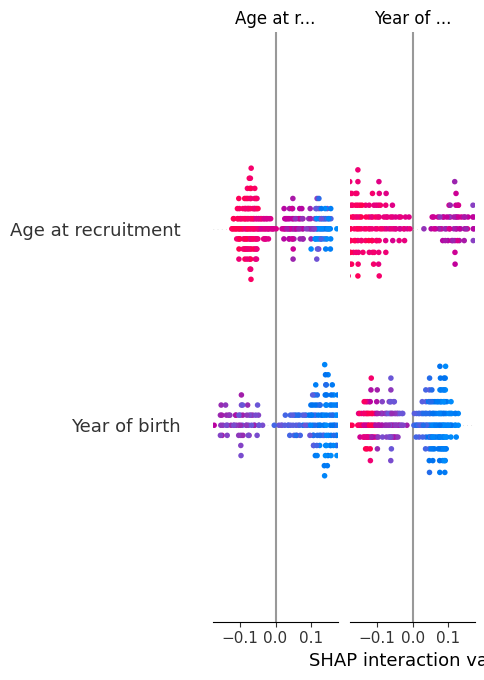

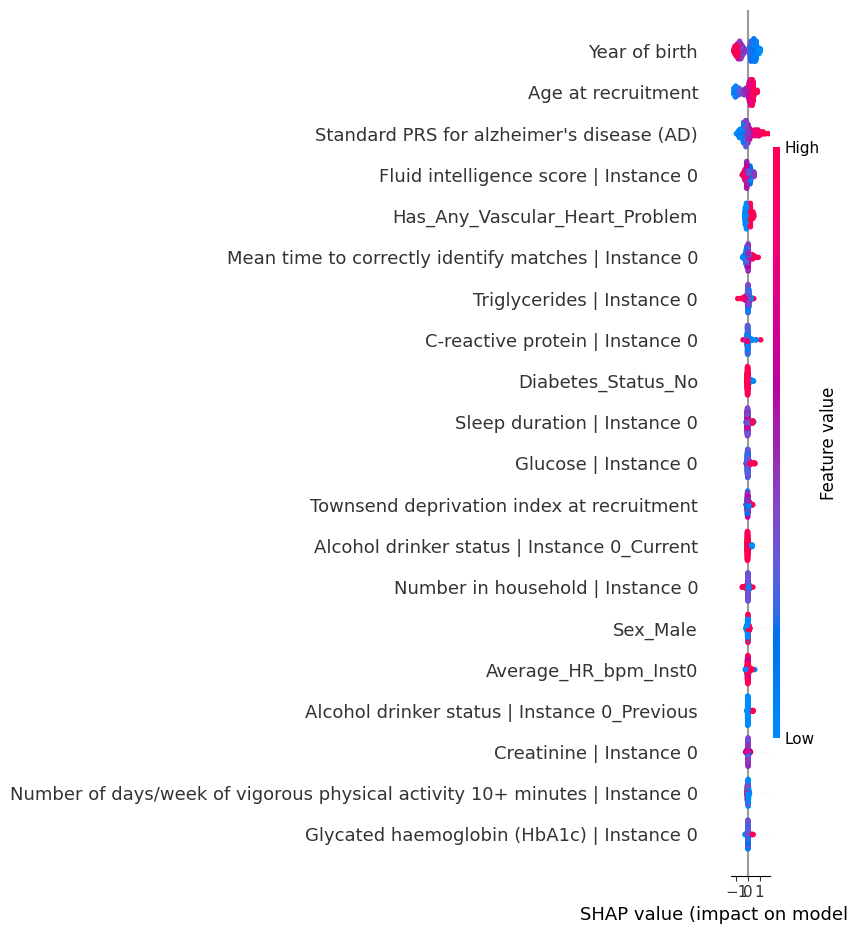

In [59]:
# For binary classification, pick class 1 (typically positive class)
shap.summary_plot(shap_values_rf, X_test_df)

# For GB (usually returns single matrix)
shap.summary_plot(shap_values_gb, X_test_df)


#####  RFE with Best Models RSA features included (All Metrics Scoring)

In [70]:
#  Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

#  Define estimators
estimators = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

# feature_names is now correctly set above - no need to reassign
print(f"✅ Using feature_names with {len(feature_names)} features matching data shape {X_train.shape[1]}")

# 🔹 Model evaluation function
def evaluate_model_scoring(X_train, y_train, X_val, y_val, X_test, y_test, feature_names, name, base_est, scoring, cv):
    est_copy = deepcopy(base_est)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('fs', RFECV(estimator=est_copy, step=1, cv=cv, scoring=scoring, n_jobs=-1)),
        ('clf', est_copy)
    ])
    pipe.fit(X_train, y_train)

    support = pipe.named_steps['fs'].support_
    n_features = support.sum()
    
    feature_names = np.array(feature_names)
    selected = feature_names[support].tolist()

    def compute_metrics(X, y, dataset):
        y_pred = pipe.predict(X)
        y_score = pipe.predict_proba(X)[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(X)
        auc = roc_auc_score(y, y_score) if y_score is not None else np.nan
        rep = classification_report(y, y_pred, output_dict=True, zero_division=0).get('1', {})
        kappa = cohen_kappa_score(y, y_pred)
        
        
        # Print class distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        print(f"\n🔹 {dataset} predicted class distribution:")
        for cls, cnt in zip(unique, counts):
            print(f"Class {cls}: {cnt} samples")

        return {
            'Dataset': dataset,
            'Scoring': scoring,
            'Model': name,
            'Accuracy': accuracy_score(y, y_pred),
            'ROC-AUC': auc,
            'Precision': rep.get('precision', np.nan),
            'Recall': rep.get('recall', np.nan),
            'F1 Score': rep.get('f1-score', np.nan),
            'Cohen Kappa': kappa,
            'n_features': n_features,
            'features': selected
        }

    return (
        compute_metrics(X_train, y_train, 'Train'),
        compute_metrics(X_val, y_val, 'Validation'),
        compute_metrics(X_test, y_test, 'Test')
    )

# 🔹 Parallel model runs
def run_models_parallel(X_train, y_train, X_val, y_val, X_test, y_test,
                        feature_names, estimators, cv,
                        scorings=['accuracy', 'f1', 'precision', 'roc_auc'],
                        output_dir='results_parallel'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_model_scoring)(
            X_train, y_train, X_val, y_val, X_test, y_test,
            feature_names, name, model, scoring, cv
        )
        for scoring in scorings
        for name, model in estimators.items()
    )

    # Unpack results
    train_records, val_records, test_records = zip(*results)
    train_df = pd.DataFrame(train_records)
    val_df = pd.DataFrame(val_records)
    test_df = pd.DataFrame(test_records)

    # Save outputs
    train_df.to_csv(os.path.join(output_dir, 'train_best_models_with_rsa_results_parallel.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, 'validation_best_models_with_rsa_results_parallel.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test_results_best_models_with_rsa_parallel.csv'), index=False)

    # Display outputs
    print("\n✅ Training Set Performance")
    display(train_df.style.set_caption("Training Set Performance (Parallel)"))
    print("\n✅ Validation Set Performance")
    display(val_df.style.set_caption("Validation Set Performance (Parallel)"))
    print("\n✅ Test Set Performance")
    display(test_df.style.set_caption("Test Set Performance (Parallel)"))

    return train_df, val_df, test_df

# 🔹 Run models
train_df, val_df, test_df = run_models_parallel(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    feature_names,
    estimators,
    cv,
    scorings=['accuracy', 'f1', 'precision', 'roc_auc'],
    output_dir='Best_models_with_rsa_results_parallel_run'
)

✅ Using feature_names with 64 features matching data shape 64


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 110 samples
Class 1: 168 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 110 samples
Class 1: 168 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 11.7min remaining: 35.0min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 117 samples
Class 1: 161 samples

🔹 Test predicted class distribution:
Class 0: 126 samples
Class 1: 152 samples


[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed: 11.7min remaining: 19.5min



🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 115 samples
Class 1: 163 samples

🔹 Test predicted class distribution:
Class 0: 131 samples
Class 1: 147 samples


[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed: 11.8min remaining: 11.8min



🔹 Train predicted class distribution:
Class 0: 615 samples
Class 1: 682 samples

🔹 Validation predicted class distribution:
Class 0: 130 samples
Class 1: 148 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples


[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed: 12.0min remaining:  7.2min



🔹 Train predicted class distribution:
Class 0: 617 samples
Class 1: 680 samples

🔹 Validation predicted class distribution:
Class 0: 127 samples
Class 1: 151 samples

🔹 Test predicted class distribution:
Class 0: 135 samples
Class 1: 143 samples

🔹 Train predicted class distribution:
Class 0: 615 samples
Class 1: 682 samples

🔹 Validation predicted class distribution:
Class 0: 130 samples
Class 1: 148 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples


[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed: 12.0min remaining:  4.0min



🔹 Train predicted class distribution:
Class 0: 619 samples
Class 1: 678 samples

🔹 Validation predicted class distribution:
Class 0: 129 samples
Class 1: 149 samples

🔹 Test predicted class distribution:
Class 0: 141 samples
Class 1: 137 samples

✅ Training Set Performance


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 12.0min finished


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Train,accuracy,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Prefer not to answer', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Train,accuracy,Gradient Boosting,0.876638,0.951902,0.863636,0.897866,0.880419,0.753129,37,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabet


✅ Validation Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Validation,accuracy,Random Forest,0.723022,0.793886,0.690476,0.822695,0.750809,0.444375,62,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Prefer not to answer', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Validation,accuracy,Gradient Boosting,0.737410,0.796863,0.729730,0.765957,0.747405,0.474330,37,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know


✅ Test Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Test,accuracy,Random Forest,0.741007,0.809032,0.717949,0.800000,0.756757,0.481558,62,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Prefer not to answer', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Test,accuracy,Gradient Boosting,0.726619,0.815424,0.719178,0.750000,0.734266,0.453039,37,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes

#####  RFE with Best Models RSA features included (Cohens Kappa Scoring)

In [73]:
from sklearn.metrics import make_scorer, cohen_kappa_score

# Define custom scorer
cohen_kappa_scorer = make_scorer(cohen_kappa_score)


# 🔹 Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# 🔹 Define estimators
estimators = {
   
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
   
}

feature_names = np.array(feature_names)

# 🔹 Model evaluation function
def evaluate_model_scoring(X_train, y_train, X_val, y_val, X_test, y_test, feature_names, name, base_est, scoring, cv):
    est_copy = deepcopy(base_est)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('fs', RFECV(estimator=est_copy, step=1, cv=cv, scoring=cohen_kappa_scorer, n_jobs=-1)),
        ('clf', est_copy)
    ])
    pipe.fit(X_train, y_train)

    support = pipe.named_steps['fs'].support_
    n_features = support.sum()
    selected = feature_names[support].tolist()

    def compute_metrics(X, y, dataset):
        y_pred = pipe.predict(X)
        y_score = pipe.predict_proba(X)[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(X)
        auc = roc_auc_score(y, y_score) if y_score is not None else np.nan
        rep = classification_report(y, y_pred, output_dict=True, zero_division=0).get('1', {})
        kappa = cohen_kappa_score(y, y_pred)
        
        # 🔹 Print class distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        print(f"\n🔹 {dataset} predicted class distribution:")
        for cls, cnt in zip(unique, counts):
            print(f"Class {cls}: {cnt} samples")

        return {
            'Dataset': dataset,
            'Scoring': scoring,
            'Model': name,
            'Accuracy': accuracy_score(y, y_pred),
            'ROC-AUC': auc,
            'Precision': rep.get('precision', np.nan),
            'Recall': rep.get('recall', np.nan),
            'F1 Score': rep.get('f1-score', np.nan),
            'Cohen Kappa': kappa,
            'n_features': n_features,
            'features': selected
        }

    return (
        compute_metrics(X_train, y_train, 'Train'),
        compute_metrics(X_val, y_val, 'Validation'),
        compute_metrics(X_test, y_test, 'Test')
    )

# 🔹 Parallel model runs for only Cohen’s kappa
def run_models_parallel_kappa_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                        feature_names, estimators, cv,
                        output_dir='results_parallel'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_model_scoring)(
            X_train, y_train, X_val, y_val, X_test, y_test,
            feature_names, name, model, scoring='cohen_kappa', cv=cv
        )
        for name, model in estimators.items()
    )

    # Unpack results
    # feature_names = X_train.columns.tolist()
    train_records, val_records, test_records = zip(*results)
    train_df = pd.DataFrame(train_records)
    val_df = pd.DataFrame(val_records)
    test_df = pd.DataFrame(test_records)

    # Save outputs
    train_df.to_csv(os.path.join(output_dir, 'train_with_rsa_cohens_kappa_results_parallel.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, 'validation_with_rsa_cohens_kappa_esults_parallel.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test_with_rsa_cohens_kappa_results_parallel.csv'), index=False)

    # Display outputs
    print("\n✅ Training Set Performance")
    display(train_df.style.set_caption("Training Set Performance (Parallel)"))
    print("\n✅ Validation Set Performance")
    display(val_df.style.set_caption("Validation Set Performance (Parallel)"))
    print("\n✅ Test Set Performance")
    display(test_df.style.set_caption("Test Set Performance (Parallel)"))

    return train_df, val_df, test_df

# 🔹 Run models with only Cohen’s kappa
train_df, val_df, test_df = run_models_parallel_kappa_scoring(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    feature_names,
    estimators,
    cv,
    output_dir='Rsa_cohens_kappa_results_parallel_run_kappa'
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



🔹 Train predicted class distribution:
Class 0: 615 samples
Class 1: 682 samples

🔹 Validation predicted class distribution:
Class 0: 130 samples
Class 1: 148 samples

🔹 Test predicted class distribution:
Class 0: 132 samples
Class 1: 146 samples

🔹 Train predicted class distribution:
Class 0: 641 samples
Class 1: 656 samples

🔹 Validation predicted class distribution:
Class 0: 110 samples
Class 1: 168 samples

🔹 Test predicted class distribution:
Class 0: 122 samples
Class 1: 156 samples

✅ Training Set Performance


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  4.3min finished


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Train,cohen_kappa,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Prefer not to answer', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Train,cohen_kappa,Gradient Boosting,0.876638,0.951902,0.863636,0.897866,0.880419,0.753129,37,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', '


✅ Validation Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Validation,cohen_kappa,Random Forest,0.723022,0.793886,0.690476,0.822695,0.750809,0.444375,62,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Prefer not to answer', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Validation,cohen_kappa,Gradient Boosting,0.737410,0.796863,0.729730,0.765957,0.747405,0.474330,37,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do no


✅ Test Set Performance


,Dataset,Scoring,Model,Accuracy,ROC-AUC,Precision,Recall,F1 Score,Cohen Kappa,n_features,features
0,Test,cohen_kappa,Random Forest,0.741007,0.809032,0.717949,0.800000,0.756757,0.481558,62,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Heart_attack', 'Has_Angina', 'Has_Stroke', 'Has_High_blood_pressure', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Diabetes_Status_No', 'Diabetes_Status_Yes', 'Smoking status | Instance 0_Current', 'Smoking status | Instance 0_Never', 'Smoking status | Instance 0_Prefer not to answer', 'Smoking status | Instance 0_Previous', 'Alcohol drinker status | Instance 0_Current', 'Alcohol drinker status | Instance 0_Never', 'Alcohol drinker status | Instance 0_Previous', 'Alcohol intake frequency. | Instance 0_Daily or almost daily', 'Alcohol intake frequency. | Instance 0_Never', 'Alcohol intake frequency. | Instance 0_Once or twice a week', 'Alcohol intake frequency. | Instance 0_One to three times a month', 'Alcohol intake frequency. | Instance 0_Prefer not to answer', 'Alcohol intake frequency. | Instance 0_Special occasions only', 'Alcohol intake frequency. | Instance 0_Three or four times a week', 'Bipolar and major depression status | Instance 0_Bipolar I Disorder', 'Bipolar and major depression status | Instance 0_Bipolar II Disorder', 'Bipolar and major depression status | Instance 0_No Bipolar or Depression', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (moderate)', 'Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)', 'Bipolar and major depression status | Instance 0_Single Probable major depression episode', 'Probable recurrent major depression (moderate) | Instance 0_Yes', 'Probable recurrent major depression (severe) | Instance 0_Yes', 'Single episode of probable major depression | Instance 0_Yes', 'Worrier / anxious feelings | Instance 0_Do not know', 'Worrier / anxious feelings | Instance 0_No', 'Worrier / anxious feelings | Instance 0_Prefer not to answer', 'Worrier / anxious feelings | Instance 0_Yes', 'Hand grip strength | Instance 0', 'Gate_speed_slow']"
1,Test,cohen_kappa,Gradient Boosting,0.726619,0.815424,0.719178,0.750000,0.734266,0.453039,37,"['Age at recruitment', 'Year of birth', ""Standard PRS for alzheimer's disease (AD)"", 'Townsend deprivation index at recruitment', 'Number in household | Instance 0', 'Has_Angina', 'Has_Stroke', 'Has_Any_Vascular_Heart_Problem', 'Sleep duration | Instance 0', 'Number of days/week of vigorous physical activity 10+ minutes | Instance 0', 'Number of days/week of moderate physical activity 10+ minutes | Instance 0', 'Mean time to correctly identify matches | Instance 0', 'Fluid intelligence score | Instance 0', 'Cholesterol | Instance 0', 'Triglycerides | Instance 0', 'C-reactive protein | Instance 0', 'Glucose | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0', 'Creatinine | Instance 0', 'Computed_RSA_ln_ms2_Inst0', 'Average_HR_bpm_Inst0', 'Average_RR_ms_Inst0', 'Pretest_RSA_ln_ms2_Inst0', 'Activity_RSA_ln_ms2_Inst0', 'Recovery_RSA_ln_ms2_Inst0', 'Avg_HeartPeriod_ms_Inst0', 'Sex_Female', 'Sex_Male', 'Diabetes_Status_Do not know', 'Di

#####  RFE with MLP RSA features included (All Metrics Scoring)

In [74]:
def mlp_feature_importance(estimator):
    return np.abs(estimator.coefs_[0]).mean(axis=1)

def run_mlp_rfe_pipeline_multi_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                                       feature_names, cv, output_dir='mlp_rfe_results',
                                       hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42,
                                       scorings=['accuracy', 'precision', 'roc_auc', 'f1']):

    os.makedirs(output_dir, exist_ok=True)

    all_val_results = []
    all_test_results = []
    all_train_results = []

    for scoring in scorings:
        print(f"\n🔹 Running RFECV with scoring = {scoring}")

        # Define MLP estimator
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=random_state,
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1
        )

        # RFECV with current scoring
        rfecv = RFECV(
            estimator=mlp,
            step=1,
            cv=cv,
            scoring=scoring,
            importance_getter=mlp_feature_importance
        )

        # Pipeline
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfecv),
            ('classifier', MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=max_iter,
                random_state=random_state,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1
            ))
        ])

        # Fit on training data
        pipe.fit(X_train, y_train)

        # Extract selected features
        support = pipe.named_steps['rfe'].support_
        selected_feats = np.array(feature_names)[support].tolist()
        n_selected = support.sum()

        print(f"✅ [{scoring}] MLP-RFE selected {n_selected} features:")
        for f in selected_feats:
            print("   •", f)

        # Define evaluation function
        def eval_split(X, y, split_name):
            X_sel = pipe.named_steps['scaler'].transform(X)[:, support]
            y_pred = pipe.named_steps['classifier'].predict(X_sel)
            y_proba = pipe.named_steps['classifier'].predict_proba(X_sel)[:, 1]

            # Print class distribution
            unique, counts = np.unique(y_pred, return_counts=True)
            print(f"\n🔹 [{scoring}] {split_name} predicted class distribution:")
            for cls, cnt in zip(unique, counts):
                print(f"Class {cls}: {cnt} samples")

            return {
                'Scoring': scoring,
                'Split': split_name,
                'Accuracy': accuracy_score(y, y_pred),
                'Precision': precision_score(y, y_pred, zero_division=0),
                'Recall': recall_score(y, y_pred, zero_division=0),
                'ROC-AUC': roc_auc_score(y, y_proba),
                'F1 Score': f1_score(y, y_pred, zero_division=0),
                'Cohen Kappa': cohen_kappa_score(y, y_pred),
                'n_features': n_selected,
                'features': "; ".join(selected_feats)
            }

        # Evaluate on validation and test sets
        all_train_results.append(eval_split(X_train, y_train, 'Training'))
        all_val_results.append(eval_split(X_val, y_val, 'Validation'))
        all_test_results.append(eval_split(X_test, y_test, 'Test'))

    # Create DataFrames
    train_df = pd.DataFrame(all_train_results)
    val_df = pd.DataFrame(all_val_results)
    test_df = pd.DataFrame(all_test_results)

    # Save results
    train_path = os.path.join(output_dir, 'train_mlp_rsa_rfe_multi_scoring.csv')
    val_path = os.path.join(output_dir, 'validation_mlp_rsa_rfe_multi_scoring.csv')
    test_path = os.path.join(output_dir, 'test_mlp_rsa_rfe_multi_scoring.csv')
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"\n📁 All results saved to:\n  📄 {train_path}\n  📄 {val_path}\n  📄 {test_path}\n")

    display(train_df.style.set_caption("📊 MLP-RFE Training Results (Multiple Scorings)"))
    display(val_df.style.set_caption("📊 MLP-RFE Validation Results (Multiple Scorings)"))
    display(test_df.style.set_caption("📊 MLP-RFE Test Results (Multiple Scorings)"))

    return train_df, val_df, test_df

# 🔹 Run the updated pipeline
train_mlp_df, val_mlp_df, test_mlp_df = run_mlp_rfe_pipeline_multi_scoring(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    feature_names=feature_names,
    cv=cv,
    output_dir='Rsa_mlp_rfe_results_multi_scoring',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    scorings=['accuracy', 'precision', 'roc_auc', 'f1']
)



🔹 Running RFECV with scoring = accuracy
✅ [accuracy] MLP-RFE selected 20 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Diabetes_Status_Do not know
   • Diabetes_Status_No
   • Diabetes_Status_Yes
   • Smoking status | Instance 0_Previous
   • Alcohol drinker status | Instance 0_Never
   • Alcohol intake frequency. | Instance 0_Never
   • Bipolar and major depression status | Instance 0_Bipolar I Disorder
   • Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)
   • Worrier / anxious feelings | Instance 0_Prefer not to answer
   • Worrier / anxious feelings | Instance 0_Yes

🔹 [accuracy] Training predicted class distribution:
Class 0: 568 samples
Class 1: 729 samples

🔹 [accuracy] Valid

/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/samuel/Documents/Projects/Dementia Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

✅ [precision] MLP-RFE selected 29 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Creatinine | Instance 0
   • Average_HR_bpm_Inst0
   • Sex_Female
   • Sex_Male
   • Diabetes_Status_Do not know
   • Diabetes_Status_No
   • Diabetes_Status_Yes
   • Smoking status | Instance 0_Previous
   • Alcohol drinker status | Instance 0_Current
   • Alcohol drinker status | Instance 0_Never
   • Alcohol drinker status | Instance 0_Prefer not to answer
   • Alcohol drinker status | Instance 0_Previous
   • Alcohol intake frequency. | Instance 0_Never
   • Bipolar and major depression status | Instance 0_Bipolar I Disorder
   • Bipolar and major depression status | Instance 0_No Bipolar or Depression
   • Bipolar and major depression status | 

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Training,0.758674,0.735254,0.817073,0.827164,0.774007,0.516654,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
1,precision,Training,0.707787,0.726678,0.676829,0.795132,0.700868,0.415965,29,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Creatinine | Instance 0; Average_HR_bpm_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_No Bipolar or Depression; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes; Gate_speed_slow
2,roc_auc,Training,0.758674,0.735254,0.817073,0.827164,0.774007,0.516654,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
3,f1,Training,0.743254,0.698647,0.865854,0.811763,0.773315,0.484996,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Validation,0.715827,0.696203,0.780142,0.781540,0.735786,0.430535,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
1,precision,Validation,0.654676,0.685950,0.588652,0.746648,0.633588,0.310637,29,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Creatinine | Instance 0; Average_HR_bpm_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_No Bipolar or Depression; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes; Gate_speed_slow
2,roc_auc,Validation,0.715827,0.696203,0.780142,0.781540,0.735786,0.430535,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
3,f1,Validation,0.690647,0.660819,0.801418,0.767200,0.724359,0.379239,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features
0,accuracy,Test,0.737410,0.718954,0.785714,0.805642,0.750853,0.474439,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
1,precision,Test,0.690647,0.704545,0.664286,0.775104,0.683824,0.381519,29,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Creatinine | Instance 0; Average_HR_bpm_Inst0; Sex_Female; Sex_Male; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Current; Alcohol drinker status | Instance 0_Never; Alcohol drinker status | Instance 0_Prefer not to answer; Alcohol drinker status | Instance 0_Previous; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_No Bipolar or Depression; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes; Gate_speed_slow
2,roc_auc,Test,0.737410,0.718954,0.785714,0.805642,0.750853,0.474439,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes
3,f1,Test,0.705036,0.674699,0.800000,0.764752,0.732026,0.409246,17,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder


#####  RFE with MLP RSA features included (Cohens Kappa Scoring)

In [75]:

def mlp_feature_importance(estimator):
    return np.abs(estimator.coefs_[0]).mean(axis=1)

def run_mlp_rfe_pipeline_kappa_scoring(X_train, y_train, X_val, y_val, X_test, y_test,
                                       feature_names, cv, output_dir='mlp_rfe_results',
                                       hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42,
                                       scorings=['accuracy', 'precision', 'roc_auc', 'f1', 'cohen_kappa']):

    os.makedirs(output_dir, exist_ok=True)
    all_train_results = []
    all_val_results = []
    all_test_results = []

    for scoring in scorings:
        print(f"\n🔹 Running RFECV with scoring = {scoring}")

        # Define MLP estimator
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=random_state,
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1
        )

        # 🔹 Define custom scorer for Cohen's Kappa
        if scoring == 'cohen_kappa':
            scorer = make_scorer(cohen_kappa_score)
        else:
            scorer = scoring

        # RFECV with current scoring
        rfecv = RFECV(
            estimator=mlp,
            step=1,
            cv=cv,
            scoring=scorer,
            importance_getter=mlp_feature_importance
        )

        # Pipeline
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rfe', rfecv),
            ('classifier', MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=max_iter,
                random_state=random_state,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1
            ))
        ])

        # Fit on training data
        pipe.fit(X_train, y_train)

        # Extract selected features
        support = pipe.named_steps['rfe'].support_
        selected_feats = np.array(feature_names)[support].tolist()
        n_selected = support.sum()

        print(f"✅ [{scoring}] MLP-RFE selected {n_selected} features:")
        for f in selected_feats:
            print("   •", f)

        # Evaluation function
        def eval_split(X, y, split_name):
            X_sel = pipe.named_steps['scaler'].transform(X)[:, support]
            y_pred = pipe.named_steps['classifier'].predict(X_sel)
            y_proba = pipe.named_steps['classifier'].predict_proba(X_sel)[:, 1]

            # Print class distribution
            unique, counts = np.unique(y_pred, return_counts=True)
            print(f"\n🔹 [{scoring}] {split_name} predicted class distribution:")
            for cls, cnt in zip(unique, counts):
                print(f"Class {cls}: {cnt} samples")

            return {
                'Scoring': scoring,
                'Split': split_name,
                'Accuracy': accuracy_score(y, y_pred),
                'Precision': precision_score(y, y_pred, zero_division=0),
                'Recall': recall_score(y, y_pred, zero_division=0),
                'ROC-AUC': roc_auc_score(y, y_proba),
                'F1 Score': f1_score(y, y_pred, zero_division=0),
                'Cohen Kappa': cohen_kappa_score(y, y_pred),
                'n_features': n_selected,
                'features': "; ".join(selected_feats)
            }

        # Evaluate on validation and test sets
        all_train_results.append(eval_split(X_train, y_train, 'Validation'))
        all_val_results.append(eval_split(X_val, y_val, 'Validation'))
        all_test_results.append(eval_split(X_test, y_test, 'Test'))

    # Create DataFrames
    train_df = pd.DataFrame(all_train_results)
    val_df = pd.DataFrame(all_val_results)
    test_df = pd.DataFrame(all_test_results)

    # Save results
    train_path = os.path.join(output_dir, 'train_mlp_rsa_kappa_rfe.csv')
    val_path = os.path.join(output_dir, 'validation_mlp_rsa_kappa_rfe.csv')
    test_path = os.path.join(output_dir, 'test_mlp_rsa_rfe_kappa.csv')
    train_df.to_csv(train_path, index=False)
    val_df['Model'] = 'MLP-RFE'
    test_df['Model'] = 'MLP-RFE'
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"\n📁 All results saved to:\n  📄 {val_path}\n  📄 {test_path}\n")

    display(val_df.style.set_caption("📊 MLP-RFE Validation Results (Multiple Scorings)"))
    display(test_df.style.set_caption("📊 MLP-RFE Test Results (Multiple Scorings)"))

    return val_df, test_df

# 🔹 Run the updated pipeline
val_mlp_df, test_mlp_df = run_mlp_rfe_pipeline_kappa_scoring(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    feature_names=feature_names,
    cv=cv,
    output_dir='With_rsa_rfe_results_cohen_kappa',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    scorings=['cohen_kappa']
)



🔹 Running RFECV with scoring = cohen_kappa
✅ [cohen_kappa] MLP-RFE selected 20 features:
   • Age at recruitment
   • Year of birth
   • Standard PRS for alzheimer's disease (AD)
   • Townsend deprivation index at recruitment
   • Number in household | Instance 0
   • Has_Heart_attack
   • Has_Angina
   • Has_Stroke
   • Has_High_blood_pressure
   • Has_Any_Vascular_Heart_Problem
   • Diabetes_Status_Do not know
   • Diabetes_Status_No
   • Diabetes_Status_Yes
   • Smoking status | Instance 0_Previous
   • Alcohol drinker status | Instance 0_Never
   • Alcohol intake frequency. | Instance 0_Never
   • Bipolar and major depression status | Instance 0_Bipolar I Disorder
   • Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe)
   • Worrier / anxious feelings | Instance 0_Prefer not to answer
   • Worrier / anxious feelings | Instance 0_Yes

🔹 [cohen_kappa] Validation predicted class distribution:
Class 0: 568 samples
Class 1: 729 samples

🔹 [cohe

,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features,Model
0,cohen_kappa,Validation,0.715827,0.696203,0.780142,0.781540,0.735786,0.430535,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes,MLP-RFE


,Scoring,Split,Accuracy,Precision,Recall,ROC-AUC,F1 Score,Cohen Kappa,n_features,features,Model
0,cohen_kappa,Test,0.737410,0.718954,0.785714,0.805642,0.750853,0.474439,20,Age at recruitment; Year of birth; Standard PRS for alzheimer's disease (AD); Townsend deprivation index at recruitment; Number in household | Instance 0; Has_Heart_attack; Has_Angina; Has_Stroke; Has_High_blood_pressure; Has_Any_Vascular_Heart_Problem; Diabetes_Status_Do not know; Diabetes_Status_No; Diabetes_Status_Yes; Smoking status | Instance 0_Previous; Alcohol drinker status | Instance 0_Never; Alcohol intake frequency. | Instance 0_Never; Bipolar and major depression status | Instance 0_Bipolar I Disorder; Bipolar and major depression status | Instance 0_Probable Recurrent major depression (severe); Worrier / anxious feelings | Instance 0_Prefer not to answer; Worrier / anxious feelings | Instance 0_Yes,MLP-RFE


### Shap Values (With RSA, Grip Strength & Gate Speed)

In [81]:

# Fit models correctly
rf = RandomForestClassifier().fit(X_train, y_train)
gb = GradientBoostingClassifier().fit(X_train, y_train)


# Ensure it's a DataFrame (should be already)
X_test_df = pd.DataFrame(X_test, columns=feature_names)  # Optional, only needed if X_test_clean isn't already a DataFrame

# For tree-based models
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test_df)

explainer_gb = shap.TreeExplainer(gb)
shap_values_gb = explainer_gb.shap_values(X_test_df)

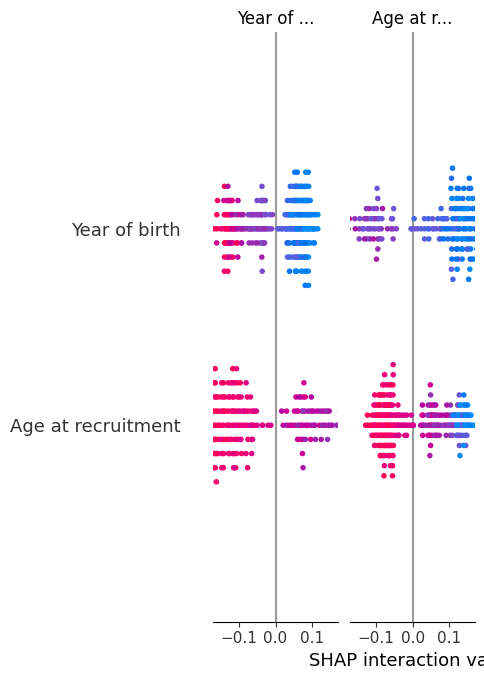

In [82]:
# For binary classification, pick class 1 (typically positive class)
shap.summary_plot(shap_values_rf,  X_test_df)

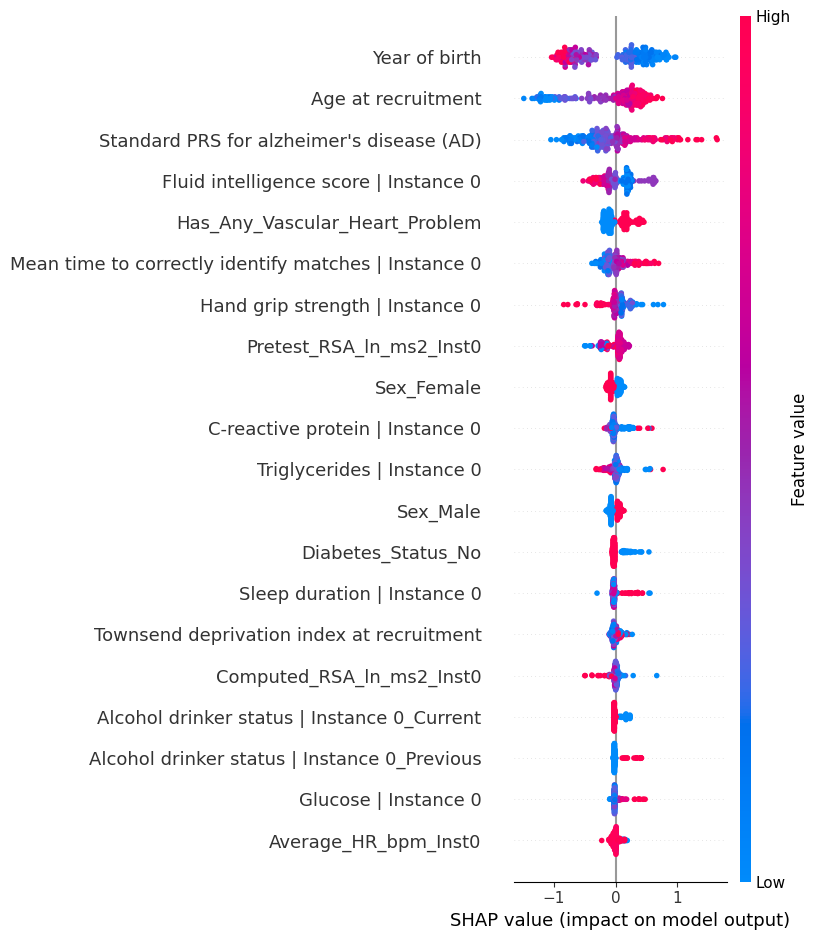

In [83]:
# For GB (usually returns single matrix)
shap.summary_plot(shap_values_gb, X_test_df)